---

# International Sports Events: Window Dressing and Repression

---

## Dependencies

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
import statsmodels.formula.api as smf
import statsmodels.api as gml
import scipy.stats.stats as stats
from IPython.display import display, HTML
from plotnine import *

---

## 1) Overview

---

Firstly we will put the main data in a DataFrame object and display it.

In [2]:
df2 = pd.read_csv('data/main_data.tab', sep='\t')
df2

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


Because the DataFrame consists of 126 rows, we will display them as list in order to display them.

In [3]:
df2.columns.tolist()

['muni',
 'id',
 'prov',
 'id_prov',
 'muniprov',
 'repression',
 'lnrepression',
 'dumrepression',
 'hostcity',
 'hostcitynum',
 'date',
 'month_date',
 'prewc_time3m',
 'time',
 'time2',
 'time3',
 'time_long',
 'time2_long',
 'time3_long',
 'hostcitytime',
 'hostcitytime2',
 'hostcitytime3',
 'hostcitytime_long',
 'hostcitytime2_long',
 'hostcitytime3_long',
 'prox_hotelonly',
 'prox_hotelonly_time',
 'prox_hotelonly_time2',
 'prox_hotelonly_time3',
 'prox_hotelpress',
 'prox_hotelpress_time',
 'prox_hotelpress_time2',
 'prox_hotelpress_time3',
 'postwc_time3mdum',
 'time_postwc',
 'time2_postwc',
 'time3_postwc',
 'lnpop_1970',
 'literacy_avg',
 'vote_frejuli',
 'lnrebact1974',
 'lnrepression70_77',
 'latitude',
 'lnstrikes',
 'lnlag_strikes',
 'lnlag2_strikes',
 'biweek1',
 'biweek2',
 'biweek3',
 'biweek4',
 'biweek5',
 'biweek6',
 'biweek7',
 'biweek8',
 'biweek9',
 'biweek10',
 'biweek11',
 'biweek12',
 'biweek13',
 'biweek14',
 'biweek15',
 'hcXbiweek1',
 'hcXbiweek2',
 'hcXbi

The columns that interest us for the Table SI.3.1. are shown below.

We will create a new DataFrame object *df_2_temp* consisting of them.

In [4]:
df_2_temp = df2[['repression',
    'lnrepression',
    'dumrepression',
    'hostcity',
    'prox_hotelonly',
    'prox_hotelpress',
    'time',
    'time2',
    'time3',
    'lnpop_1970',
    'literacy_avg',
    'vote_frejuli',
    'lnrebact1974',
    'lnrepression70_77',
    'latitude' ,
    'lnstrikes',
    'lnlag_strikes',
    'lnlag2_strikes',
    'zone1',
    'zone2',
    'zone3',
    'zone4',
    'zone5']]

Since the *time* column has to do with the dates.

We must make sure that there are no NaN values inside it.

In [5]:
df_2_temp['time'].isna().sum()

75349

In [6]:
df_2_temp.dropna(subset=['time'], inplace=True)
df_2_temp['time'].isna().sum()

C:\Users\alexi\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0

We rename the columns of *df2_temp* to the names of the indexes of Table SI.3.1.

In [7]:
cols = ['Repression events', 'Repression events (logarithmized)', 'Repression events', 'Host City', 'Proximity to Hotel', 'Proximity to Journalist Venue', 'Time', 'Time2', 'Time3', 'Population Size (logarithmized)', 'Literacy Rate', 'Peronist Vote Share', 'Rebel Activity (logarithmized)', 'Past Repression (logarithmized)', 'Latitude', 'Protest Current Month (logarithmized)', 'Protest One Month Ago (logarithmized)', 'Protest Two Months Ago (logarithmized)', 'Military Zone 1', 'Military Zone 2', 'Military Zone 3', 'Military Zone 4', 'Military Zone 5']
df_2_temp.columns = cols
df_2_temp.columns

Index(['Repression events', 'Repression events (logarithmized)',
       'Repression events', 'Host City', 'Proximity to Hotel',
       'Proximity to Journalist Venue', 'Time', 'Time2', 'Time3',
       'Population Size (logarithmized)', 'Literacy Rate',
       'Peronist Vote Share', 'Rebel Activity (logarithmized)',
       'Past Repression (logarithmized)', 'Latitude',
       'Protest Current Month (logarithmized)',
       'Protest One Month Ago (logarithmized)',
       'Protest Two Months Ago (logarithmized)', 'Military Zone 1',
       'Military Zone 2', 'Military Zone 3', 'Military Zone 4',
       'Military Zone 5'],
      dtype='object')

Finally we create a new DataFrame object that will be the final table, using the *data* dictionary to set the columns and their values respectively whilst using the columns of *df2_temp* as the indexes.

In [8]:
data_type = ['Count', 'Continous', 'Binary', 'Binary', 'Continous', 'Continous', 'Count', 'Count', 'Count', 'Continous', 'Continous', 'Continous', 'Continous', 'Continous', 'Continous', 'Continous', 'Continous', 'Continous', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary']
data = {'Type' : data_type,
        'Obs.' : df_2_temp.notna().sum(),
        'Mean' : round(df_2_temp.mean(), 3), 
        'Std. dev.' : round(np.std(df_2_temp), 3), 
        'Min.' : round(df_2_temp.min(), 3), 
        'Max.' : round(df_2_temp.max(), 3)}
df_SI_3_1 = pd.DataFrame(data=data, index=df_2_temp.columns)
print('\033[1mTable SI.3.1.\033[0m Summary statistics (Main analyses)')
df_SI_3_1

Table SI.3.1. Summary statistics (Main analyses)


,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58107,0.005,0.104,0.000,7.000
Repression events (logarithmized),Continous,58107,0.003,0.053,0.000,2.079
Repression events,Binary,58107,0.003,0.058,0.000,1.000
Host City,Binary,58383,0.010,0.100,0.000,1.000
Proximity to Hotel,Continous,58107,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continous,58107,7.079,1.629,0.000,9.398
Time,Count,58383,0.590,0.338,0.010,1.170
Time2,Count,58383,0.462,0.411,0.000,1.369
Time3,Count,58383,0.407,0.460,0.000,1.602
Population Size (logarithmized),Continous,56628,9.701,1.336,6.057,14.905


We delete *df_2_temp* as we will not be using it any more

In [9]:
del df_2_temp

The columns that interest us for the Table SI.3.2. are shown below.

We will create a new DataFrame object *df_2_temp* consisting of them.


In [10]:
df_2_temp = df2[['repression',
                'lnrepression',
                'hostcity',
                'postwc_time3mdum',
                'time_postwc',
                'time2_postwc',
                'time3_postwc',
                'lnpop_1970',
                'literacy_avg',
                'vote_frejuli' ,
                'lnrebact1974',
                'lnrepression70_77',
                'zone1',
                'zone2',
                'zone3',
                'zone4',
                'zone5']]

Here we will check for any NaN values in the columns *time_postwc, time2_postwc, time3_postwc*.

In [11]:
df_2_temp.isna().sum()

repression             465
lnrepression           465
hostcity                 0
postwc_time3mdum     75349
time_postwc          75349
time2_postwc         75349
time3_postwc         75349
lnpop_1970            4020
literacy_avg          4020
vote_frejuli          2144
lnrebact1974             0
lnrepression70_77        0
zone1                    0
zone2                    0
zone3                    0
zone4                    0
zone5                    0
dtype: int64

We drop the NaN values.

In [12]:
df_2_temp.dropna(subset=['time_postwc'], inplace=True)
df_2_temp.isna().sum()

C:\Users\alexi\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


repression             62
lnrepression           62
hostcity                0
postwc_time3mdum        0
time_postwc             0
time2_postwc            0
time3_postwc            0
lnpop_1970           1755
literacy_avg         1755
vote_frejuli          936
lnrebact1974            0
lnrepression70_77       0
zone1                   0
zone2                   0
zone3                   0
zone4                   0
zone5                   0
dtype: int64

We rename the columns of *df2_temp* to the names we want displayed on Table SI.3.2.

In [13]:
cols = ['Repression events', 'Repression events (logarithmized)', 'Host City', 'Post World Cup Period', 'Time Post World Cup', 'Time2 Post World Cup', 'Time3 Post World Cup', 'Population Size (logarithmized)', 'Literacy Rate', 'Peronist Vote Share', 'Rebel Activity (logarithmized)', 'Past Repression (logarithmized)', 'Military Zone 1', 'Military Zone 2', 'Military Zone 3', 'Military Zone 4', 'Military Zone 5']
df_2_temp.columns = cols
df_2_temp.dtypes

Repression events                    float64
Repression events (logarithmized)    float64
Host City                            float64
Post World Cup Period                float64
Time Post World Cup                  float64
Time2 Post World Cup                 float64
Time3 Post World Cup                 float64
Population Size (logarithmized)      float64
Literacy Rate                        float64
Peronist Vote Share                  float64
Rebel Activity (logarithmized)       float64
Past Repression (logarithmized)      float64
Military Zone 1                        int64
Military Zone 2                        int64
Military Zone 3                        int64
Military Zone 4                        int64
Military Zone 5                        int64
dtype: object

Finally we create a new DataFrame object that will be the final table, using the *data* dictionary to set the columns and their values respectively whilst using the columns of *df2_temp* as the indexes.

In [14]:
data_type = ['Count', 'Continous', 'Binary', 'Binary', 'Count', 'Count', 'Count', 'Continous', 'Continous', 'Continous', 'Continous', 'Continous', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary']
data = {'Type' : data_type,
        'Obs.' : df_2_temp.notna().sum(),
        'Mean' : round(df_2_temp.mean(), 3), 
        'Std. dev.' : round(np.std(df_2_temp), 3), 
        'Min.' : round(df_2_temp.min(), 3), 
        'Max.' : round(df_2_temp.max(), 3)}
df_SI_3_2 = pd.DataFrame(data=data, index=df_2_temp.columns)
print('\033[1mTable SI.3.2.\033[0m Summary statistics (Pre-World Cup period)')
df_SI_3_2

Table SI.3.2. Summary statistics (Pre-World Cup period)


,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58321,0.004,0.096,0.000,9.000
Repression events (logarithmized),Continous,58321,0.002,0.047,0.000,2.303
Host City,Binary,58383,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,58383,0.786,0.410,0.000,1.000
Time Post World Cup,Count,58383,0.590,0.338,0.010,1.170
Time2 Post World Cup,Count,58383,0.462,0.411,0.000,1.369
Time3 Post World Cup,Count,58383,0.407,0.460,0.000,1.602
Population Size (logarithmized),Continous,56628,9.701,1.336,6.057,14.905
Literacy Rate,Continous,56628,0.717,0.110,0.316,0.901
Peronist Vote Share,Continous,57447,58.752,11.539,28.500,94.300


We delete *df_2_temp* as we won't be needing any more.

In [15]:
del df_2_temp

We put the figure 1 data in a DataFrame object and display it.

In [16]:
df = pd.read_csv('data/figure_1_data.tab', sep='\t')
df

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


We also check the datatypes of our DataFrame.

In [17]:
df.dtypes

postcwy          float64
event_selec      float64
autochost        float64
autochostperc    float64
dtype: object

We add a *years* column on our DataFrame that corresponds to the 4 year intervals between 1990 and 2024.

In [18]:
years = ['1990 - 1994', '1995 - 1999', '2000 - 2004', '2005 - 2009', '2010 - 2014', '2015 - 2019', '2020 - 2024']
df['years'] = years
df

,postcwy,event_selec,autochost,autochostperc,years
0,1.0,25.0,2.0,8.000000,1990 - 1994
1,2.0,31.0,4.0,12.903226,1995 - 1999
2,3.0,25.0,5.0,20.000000,2000 - 2004
3,4.0,24.0,6.0,25.000000,2005 - 2009
4,5.0,30.0,6.0,20.000000,2010 - 2014
5,6.0,32.0,9.0,28.125000,2015 - 2019
6,7.0,27.0,10.0,37.037037,2020 - 2024


We create the figure by ploting the *years* column on the x axis against the *autochostperc* column on the y axis.

FIGURE 1. Autocratic Hosts of International Sports Events, 1990–2024


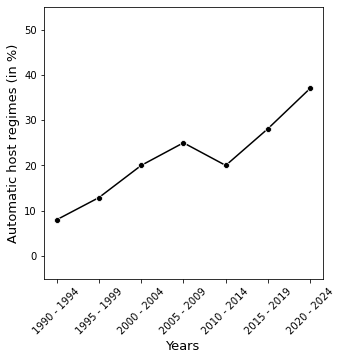

Note: Graph shows the five-year shares of autocratic states
among all hosting nations of the world championships in athletics,
basketball, cricket, football, handball, ice hockey, rugby, table
tennis, and volleyball, as well as the Summer and Winter
Olympics. See Figure SI.1.1 for a breakdown of all tournaments
and hosts since 1945.


In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.lineplot(data=df, x='years', y='autochostperc', marker='o', color='#000000')

ax.set_xlabel('Years', size=13)
ax.set_ylabel('Automatic host regimes (in %)', size=13)
ax.set_ylim(-5, 55)
ax.tick_params(axis='x', rotation=45)
print('\033[1mFIGURE 1. Autocratic Hosts of International Sports Events, 1990–2024\033[0m')
plt.show()
print('\033[1mNote:\033[0m Graph shows the five-year shares of autocratic states\n'+
'among all hosting nations of the world championships in athletics,\n'+
'basketball, cricket, football, handball, ice hockey, rugby, table\n'+
'tennis, and volleyball, as well as the Summer and Winter\n'+
'Olympics. See Figure SI.1.1 for a breakdown of all tournaments\n'+
'and hosts since 1945.')

We delete *df* as we won't be needing any more

In [20]:
del df

We put the figure SI.1.1. data in a DataFrame object and display it.

In [21]:
df = pd.read_csv('data/figure_SI11_data.tab', sep='\t')
df

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0
...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN
329,2014.0,0.0,27.5,28.0,NaN
330,2018.0,0.0,27.5,28.0,NaN
331,2018.0,0.0,27.5,28.0,NaN


We define the function *get_organisations(df)* that returns a list of the indexes where the baseline of an element x is greater than the one of element x+1 and hence indicating a new organisation from the plot.

In [22]:
def get_organisations(df):
    indexes = []
    for i in df.index:
        if i == len(df.index) - 1:
            break
        if df.at[i + 1, 'baseline'] > df.at[i, 'baseline']:
            indexes.append(i+1)
    return indexes
    

Display those indexes.

In [23]:
indexes = get_organisations(df)
indexes

[12, 32, 52, 71, 150, 180, 207, 236, 291, 312]

We create a new column *organisations* with the names of those organisations with the help of the indexes we got above.

In [24]:
df['organisations'] = 'None'
orgs = ['Rugby World Cup', 'Winter Olympic Games', 'Summer Olympic Games', 'World Athletics Championships', 'Ice Hockey World Championships', 'FIFA World Cup', 'Cricket World Cup', 'World Handball Championship', 'World Table Tennis Championships', 'Basketball World Cup', 'Volleyball World Championship']
for i in range(len(indexes)):
    if i == 0:
        df[:indexes[i]]['organisations'] = orgs[i]
    elif i == len(indexes) - 1:
        df[indexes[i-1]:indexes[i]]['organisations'] = orgs[i]
        df[indexes[i]:]['organisations'] = orgs[i+1]
    else:
        df[indexes[i-1]:indexes[i]]['organisations'] = orgs[i]
        

C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\649046982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\649046982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\649046982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Our DataFrame now looks like this.

In [25]:
df

,year,regime,baseline,democ,autoc,organisations
0,1987.0,0.0,2.5,3.0,NaN,Rugby World Cup
1,1987.0,0.0,2.5,3.0,NaN,Rugby World Cup
2,1991.0,0.0,2.5,3.0,NaN,Rugby World Cup
3,1991.0,0.0,2.5,3.0,NaN,Rugby World Cup
4,1995.0,1.0,2.5,NaN,2.0,Rugby World Cup
...,...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN,Volleyball World Championship
329,2014.0,0.0,27.5,28.0,NaN,Volleyball World Championship
330,2018.0,0.0,27.5,28.0,NaN,Volleyball World Championship
331,2018.0,0.0,27.5,28.0,NaN,Volleyball World Championship


We observe that each row that has a value in the *autoc* column has a NaN value in the *democ* column and vice versa.

We assign each row's *regime* column to the value -1 whose *autoc* value is not NaN.

In [26]:
df['regime'].loc[df['autoc'].notna()] = - 1

C:\Users\alexi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


We assign each row's *regime* column to the value 1 whose *democ* value is not NaN.

In [27]:
df['regime'].loc[df['regime'] != - 1] = 1

Hence our *regime* column now comprises of values -1 and 1.

In [28]:
df['regime'].unique()

array([ 1., -1.])

Our DataFrame looks like this.

In [29]:
df

,year,regime,baseline,democ,autoc,organisations
0,1987.0,1.0,2.5,3.0,NaN,Rugby World Cup
1,1987.0,1.0,2.5,3.0,NaN,Rugby World Cup
2,1991.0,1.0,2.5,3.0,NaN,Rugby World Cup
3,1991.0,1.0,2.5,3.0,NaN,Rugby World Cup
4,1995.0,-1.0,2.5,NaN,2.0,Rugby World Cup
...,...,...,...,...,...,...
328,2010.0,1.0,27.5,28.0,NaN,Volleyball World Championship
329,2014.0,1.0,27.5,28.0,NaN,Volleyball World Championship
330,2018.0,1.0,27.5,28.0,NaN,Volleyball World Championship
331,2018.0,1.0,27.5,28.0,NaN,Volleyball World Championship


We create a list *orgs* that has the unique values of our *organisations* column.
Then we reverse that list to achieve the correct order of the organisations as shown in the figure.

Sports events are ordered according to the share of autocratic hosts from highest
(top) to lowest (bottom).

In [30]:
orgs = df['organisations'].unique().tolist()
orgs.reverse()
orgs

['Volleyball World Championship',
 'Basketball World Cup',
 'World Table Tennis Championships',
 'World Handball Championship',
 'Cricket World Cup',
 'FIFA World Cup',
 'Ice Hockey World Championships',
 'World Athletics Championships',
 'Summer Olympic Games',
 'Winter Olympic Games',
 'Rugby World Cup']

Now we create a categorical series with the elements of the list we created above.

In [31]:
orgs_category = pd.Categorical(df['organisations'], categories=orgs)
orgs_category

['Rugby World Cup', 'Rugby World Cup', 'Rugby World Cup', 'Rugby World Cup', 'Rugby World Cup', ..., 'Volleyball World Championship', 'Volleyball World Championship', 'Volleyball World Championship', 'Volleyball World Championship', 'Volleyball World Championship']
Length: 333
Categories (11, object): ['Volleyball World Championship', 'Basketball World Cup', 'World Table Tennis Championships', 'World Handball Championship', ..., 'World Athletics Championships', 'Summer Olympic Games', 'Winter Olympic Games', 'Rugby World Cup']

We assign a column in our DataFrame to that categorical series and delete the previous column *organisations* as it is not needed any more.

In [32]:
df = df.assign(orgs_category=orgs_category)

In [33]:
del df['organisations']

In [34]:
df.dtypes

year              float64
regime            float64
baseline          float64
democ             float64
autoc             float64
orgs_category    category
dtype: object

Finally we create the plot and achieve the correct organisation order thanks to the steps taken above.

C:\Users\alexi\anaconda3\lib\site-packages\plotnine\scales\scales.py:36: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

C:\Users\alexi\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_col : Removed 21 rows containing missing values.


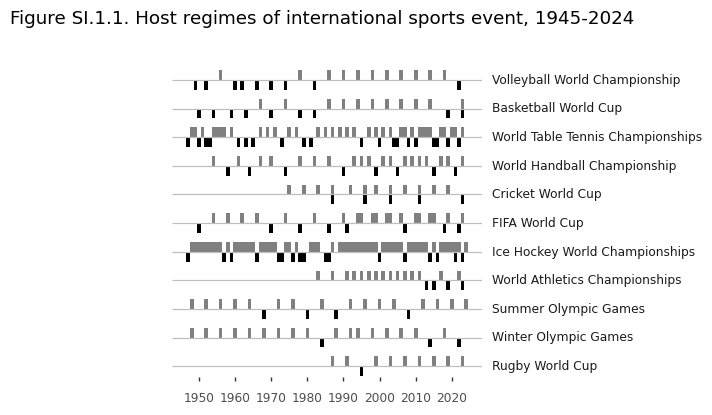

<ggplot: (100418894315)>

In [35]:
ggplot(df) + \
geom_col(aes(x="year", y='regime', fill='factor(regime)', width=1), show_legend=False) +\
xlim(1945, 2024) + \
ylim(-1,1) +\
scale_fill_manual(['black', 'grey']) + \
labs(x='', y='') + \
theme(legend_position='None', axis_ticks_major_y=element_blank(), 
      axis_ticks_minor_y=element_blank(), axis_text_y=element_blank(),
      strip_text_y=element_text(angle = 0, ha='left'), panel_background=element_blank(), 
      strip_background = element_blank(), axis_text=element_text(margin={'t': 8}),
      figure_size=(4,4)) + \
geom_hline(yintercept=0, size=0.5, color='#BEBEBE') +\
scale_x_continuous(breaks=([1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])) + \
labs(title = "Figure SI.1.1. Host regimes of international sports event, 1945-2024\n\n") +\
facet_grid('orgs_category ~ ')

We delete our DataFrame for computational resourses.

In [36]:
del df

---

## 2) Repression in Departments with and without Host Cities

---

We check for any NaN values in the *time* column as it indicates dates and remove them.

In [37]:
df2['time'].isna().sum()

75349

In [38]:
df2.dropna(subset=['time'], inplace=True)
df2['time'].isna().sum()

0

We create the first model of Table SI.4.1.

In [39]:
model1 = smf.ols(formula="lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2", data=df2)
res1 = model1.fit(cov_type='HC1')
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.90
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.31e-13
Time:                        01:38:09   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0026      0.001      4.027      0.000       0.001       0.004
hostcitytime      0.4012      0.144      2.780      0.005       0.118       0.684
hostcitytime2    -0.3230      0.110     -2.923      0.003      -0.540      -0.106
hostcity          0.0202      0.034      0.591      0.554      -0.047       0.087
time             -0.0028      0.002     -1.233      0.218      -0.007       0.002
time2             0.0020      0.002      1.132      0.258      -0.001       0.006
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

We create the second model of Table SI.4.1.

In [40]:
model2 = smf.ols(formula="lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77", data=df2)
res2 = model2.fit(cov_type='HC1')
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.56
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.16e-32
Time:                        01:38:09   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0041      0.002     -2.056      0.040      -0.008      -0.000
hostcitytime          0.4014      0.143      2.801      0.005       0.121       0.682
hostcitytime2        -0.3231      0.110     -2.945      0.003      -0.538      -0.108
hostcity             -0.0037      0.034     -0.109      0.913      -0.070       0.063
time                 -0.0030      0.002     -1.297      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0010      0.000      4.623      0.000       0.001       0.001
vote_frejuli       -3.22e-05   1.86e-05     -1.727      0.084   -6.87e-05    4.34e-06
literacy_avg         -0.0056      0.001     -5.192      0.000      -0.008      -0.003
lnrebact1974         -0.0001      0.000     -0.939      0.348      -0.000       0.000
lnrepression70_77     0.0041      0.000     10.816      0.000       0.003       0.005
==============================================================================
Omnibus:                   119962.002   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        462693274.776
Skew:                          18.965   Prob(JB):                         0.00
Kurtosis:                     445.123   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the third model of Table SI.4.1.

In [41]:
model3 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5', data=df2)
res3 = model3.fit(cov_type='HC0')
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.63e-31
Time:                        01:38:09   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0039      0.002     -1.660      0.097      -0.009       0.001
hostcitytime          0.4014      0.142      2.825      0.005       0.123       0.680
hostcitytime2        -0.3231      0.109     -2.969      0.003      -0.536      -0.110
hostcity             -0.0040      0.034     -0.120      0.905      -0.070       0.062
time                 -0.0030      0.002     -1.296      0.195      -0.008       0.002
time2                 0.0022      0.002      1.190      0.234      -0.001       0.006
lnpop_1970            0.0033      0.000      7.885      0.000       0.002       0.004
vote_frejuli       1.047e-05   2.41e-05      0.434      0.664   -3.68e-05    5.78e-05
literacy_avg         -0.0231      0.002     -9.287      0.000      -0.028      -0.018
lnrebact1974         -0.0014      0.000     -6.792      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000      8.268      0.000       0.002       0.004
zone2                -0.0147      0.002     -9.507      0.000      -0.018      -0.012
zone3                -0.0117      0.001     -9.014      0.000      -0.014      -0.009
zone4                -0.0082      0.004     -2.172      0.030      -0.016      -0.001
zone5                -0.0092      0.001     -9.209      0.000      -0.011      -0.007
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844768.905
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will define 3 functions that will help us with the aesthetic creation of our tables.

We define the fucntion *roundData(data)* that takes as input a list and 
1. Casts every element to string a value.
2. Rounds the first 12 elements to 3 decimal points
3. Rounds the 14th, 15th, 16th and 17th elements to 2 decimal points


In [42]:
def roundData(data):
    for i in range (len(data)):
        if i < 12:
            data[i] = str(round(data[i], 3))
        elif i == 14 or i == 15 or i == 16 or i == 17:
            data[i] = str(round(data[i], 2))
        else:
            data[i] = str(data[i])

We define the function *addStandardErrors(data)* that takes as input a list and
1. Add a '/n' prefix to every even index ranging from 0 to 12 as well as the value of the next element wrapped in parentheses.
2. Pops every odd index from the list.

In [43]:
def addStandardErrors(data):
    for i in range (0, 12, 2):
        data[i] += '\n' + '(' + data[i+1] + ')'
    j=0
    for i in range(1, 12, 2):
        data.pop(i - j)
        j += 1
    

We define the function *check_p_values(data, data_p, flag=False)* that takes as input two lists and a flag and
1. Depending on the value of each element of the second list adds either [ * * * ,   * *,   * , + ] to the corresponding element of the first list.

In [44]:
def check_p_values(data, data_p, flag=False):
    j=0
    for i in range (len(data_p)):
        if data_p[i] <= 0.001:
            if i == 6 and not flag:
                data[14] += '***'
            elif i == 6 and flag:
                data[16] += '***'
            else:
                data[i * 2] += '***' 
                
        elif data_p[i] <= 0.01:
            data[i * 2] += '**'
          
        elif data_p[i] <= 0.05:
            data[i * 2] += '*'
            
            
        elif data_p[i] <= 0.1:
            data[i * 2] += '+'
            
        j=1

We define the function *pretty_print(df)* which will be used for formating the DataFrames we will create to the tables depicted on the paper.

It allows as to use the */n* character as a line break command.

In [45]:
def pretty_print(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

This is how we will go about creating these tables.

We create 6 lists. 

The first 3 correspond to the coefficients of each row of the table with their robust standard errors and the last 3 to their p values respectively.

[ coeff1, error1, coeff2, error2, coeff3, error3, coeff4, error4, ... ] 

[ pval1, pval2, pval3, pval4, ... ]

Then we pass them through each of the functions defined above.

roundData --> Rounds the data and makes it a string.

addStandardErrors --> Concatenates the coefficient with its standard error into a single variable divided by /n.

check_p_values --> Adds the appropriate symbol that represents the range of the p value.

In [46]:
data1 = []
data2 = [] 
data3 = []
data1p = [] 
data2p = [] 
data3p = []

In [47]:
data1.extend([res1.params[1], res1.bse[1], res1.params[2], res1.bse[2], res1.params[3], res1.bse[3], res1.params[4], res1.bse[4], res1.params[5], res1.bse[5], res1.params[0], res1.bse[0], np.NaN, np.NaN, res1.fvalue, res1.rsquared, int(res1.nobs)])
data2.extend([res2.params[1], res2.bse[1], res2.params[2], res2.bse[2], res2.params[3], res2.bse[3], res2.params[4], res2.bse[4], res2.params[5], res2.bse[5], res2.params[0], res2.bse[0], np.NaN, np.NaN, res2.fvalue, res2.rsquared, int(res2.nobs)])
data3.extend([res3.params[1], res3.bse[1], res3.params[2], res3.bse[2], res3.params[3], res3.bse[3], res3.params[4], res3.bse[4], res3.params[5], res3.bse[5], res3.params[0], res3.bse[0], np.NaN, np.NaN, res3.fvalue, res3.rsquared, int(res3.nobs)])

data1p.extend([res1.pvalues[1], res1.pvalues[2], res1.pvalues[3], res1.pvalues[4], res1.pvalues[5], res1.pvalues[0], res1.f_pvalue])
data2p.extend([res2.pvalues[1], res2.pvalues[2], res2.pvalues[3], res2.pvalues[4], res2.pvalues[5], res2.pvalues[0], res2.f_pvalue])
data3p.extend([res3.pvalues[1], res3.pvalues[2], res3.pvalues[3], res3.pvalues[4], res3.pvalues[5], res3.pvalues[0], res3.f_pvalue])

roundData(data1)
roundData(data2)
roundData(data3)

data1

['0.401',
 '0.144',
 '-0.323',
 '0.11',
 '0.02',
 '0.034',
 '-0.003',
 '0.002',
 '0.002',
 '0.002',
 '0.003',
 '0.001',
 'nan',
 'nan',
 '13.9',
 '0.05',
 '58107']

In [48]:
check_p_values(data1, data1p)
check_p_values(data2, data2p)
check_p_values(data3, data3p)

In [49]:
data1

['0.401**',
 '0.144',
 '-0.323**',
 '0.11',
 '0.02',
 '0.034',
 '-0.003',
 '0.002',
 '0.002',
 '0.002',
 '0.003***',
 '0.001',
 'nan',
 'nan',
 '13.9***',
 '0.05',
 '58107']

In [50]:
addStandardErrors(data1)
addStandardErrors(data2)
addStandardErrors(data3)

In [51]:
data1

['0.401**\n(0.144)',
 '-0.323**\n(0.11)',
 '0.02\n(0.034)',
 '-0.003\n(0.002)',
 '0.002\n(0.002)',
 '0.003***\n(0.001)',
 'nan',
 'nan',
 '13.9***',
 '0.05',
 '58107']

Finally we create a new DataFrame object that will be the final table, using the data dictionary to set the columns and their values respectively whilst using the *cols* list elements as the indexes.

In [52]:
cols = ['Host City * Time', 'Host City * Time2', 'Host City', 'Time', 'Time2', 'Constant', 'Controls', 'Zone FE', 'F Statistic', 'R Squared', 'Observations']
data = {'(1)' : data1,
        '(2)' : data2,
        '(3)' : data3}
df_SI_4_1 = pd.DataFrame(data=data, index=cols, columns=['(1)', '(2)', '(3)'])
df_SI_4_1.iloc[6] = ['✘', '✔', '✔']
df_SI_4_1.iloc[7] = ['✘', '✘', '✔']
print('\n\033[1mTable SI.4.1.\033[0m Linear regressions (OLS) for repression in departments with and without host cities.')
pretty_print(df_SI_4_1)
print('\033[1mNote:\033[0m Values are coefficients with robust standard errors in parentheses. \n { + : p<0.1, * : p<0.05, ** : p<0.01, *** : p<0.001 }')


Table SI.4.1. Linear regressions (OLS) for repression in departments with and without host cities.


,(1),(2),(3)
Host City * Time,0.401**(0.144),0.401**(0.143),0.401**(0.142)
Host City * Time2,-0.323**(0.11),-0.323**(0.11),-0.323**(0.109)
Host City,0.02(0.034),-0.004(0.034),-0.004(0.034)
Time,-0.003(0.002),-0.003(0.002),-0.003(0.002)
Time2,0.002(0.002),0.002(0.002),0.002(0.002)
Constant,0.003***(0.001),-0.004*(0.002),-0.004+(0.002)
Controls,✘,✔,✔
Zone FE,✘,✘,✔
F Statistic,13.9***,17.56***,12.96***
R Squared,0.05,0.06,0.06


Note: Values are coefficients with robust standard errors in parentheses. 
 { + : p<0.1, * : p<0.05, ** : p<0.01, *** : p<0.001 }


From the table above we deduct that:
1. The positive and statistically significant coefficient of *HostCity * Time* supports the hypothesis that in the run-up to World Cup, state repression spiked in host cities, but not in other.

2. The negative and statistically significant coefficient of *HostCity * Time2* supports the hypothesis that during the World Cup, state repression dropped in host cities but remained unchanged in other cities.

---

## 3) Graphical Overview of Effects

---

For Figure 5 we need to use the third model used in the table above (Table SI.4.1.).

Using *fittedvalues* we get the predicted values for the original (unwhitened) design.

In [53]:
res3.fittedvalues

59       -0.002368
60       -0.002398
61       -0.002427
62       -0.002456
63       -0.002485
            ...   
133367   -0.006341
133368   -0.006322
133369   -0.006303
133370   -0.006284
133371   -0.006264
Length: 56394, dtype: float64

Using *get_prediction* we get the prediction results.

Using *summary_frame* we get the summary frame of mean, variance and confidence interval.

Using *alpha=0.5* we ensure that we get 95% confidence intervals.

In [54]:
m3_preds = res3.get_prediction(df2).summary_frame(alpha=0.5)
m3_preds

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.002368,0.000941,-0.003002,-0.001733,-0.037305,0.032570
1,-0.002398,0.000926,-0.003022,-0.001773,-0.037335,0.032540
2,-0.002427,0.000912,-0.003042,-0.001812,-0.037364,0.032510
3,-0.002456,0.000899,-0.003062,-0.001850,-0.037393,0.032481
4,-0.002485,0.000886,-0.003082,-0.001887,-0.037421,0.032452
...,...,...,...,...,...,...
56389,-0.006341,0.000925,-0.006965,-0.005717,-0.041279,0.028596
56390,-0.006322,0.000934,-0.006952,-0.005693,-0.041260,0.028615
56391,-0.006303,0.000942,-0.006939,-0.005668,-0.041241,0.028634
56392,-0.006284,0.000952,-0.006926,-0.005642,-0.041221,0.028654


We create a DataFrame object consisting of the columns used in the formula of our model.

In [55]:
fig5_df = df2[['lnrepression', 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
fig5_df

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5
59,0.0,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
60,0.0,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
61,0.0,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
62,0.0,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
63,0.0,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133635,0.0,0.0,0.0,0.0,1.13,1.2769,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133636,0.0,0.0,0.0,0.0,1.14,1.2996,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133637,0.0,0.0,0.0,0.0,1.15,1.3225,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0
133638,0.0,0.0,0.0,0.0,1.16,1.3456,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0


We create a new column *fittedvalues* to store those fittedvalues.

In [56]:
fig5_df['fittedvalues'] = res3.fittedvalues
fig5_df

C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\1343994831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,fittedvalues
59,0.0,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002368
60,0.0,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002398
61,0.0,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002427
62,0.0,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002456
63,0.0,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133635,0.0,0.0,0.0,0.0,1.13,1.2769,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133636,0.0,0.0,0.0,0.0,1.14,1.2996,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133637,0.0,0.0,0.0,0.0,1.15,1.3225,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133638,0.0,0.0,0.0,0.0,1.16,1.3456,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN


We also check for any NaN values in the columns *time* and *fittedvalues*.

In [57]:
fig5_df['time'].isna().sum(), fig5_df['fittedvalues'].isna().sum()

(0, 1989)

Seeing tha indeed we have some NaN values, we drop them and reset the indexes.

In [58]:
fig5_df.dropna(subset=['fittedvalues'], inplace=True)
fig5_df.reset_index(drop=True, inplace=True)
fig5_df['time'].isna().sum(), fig5_df['fittedvalues'].isna().sum()

C:\Users\alexi\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(0, 0)

We create two new columns *mean_ci_upper* and *mean_ci_lower* to store these values respectively.

In [59]:
fig5_df['mean_ci_upper'] = m3_preds['mean_ci_upper']
fig5_df['mean_ci_lower'] = m3_preds['mean_ci_lower']
fig5_df

C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\3674565246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\3674565246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,fittedvalues,mean_ci_upper,mean_ci_lower
0,0.0,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002368,-0.001733,-0.003002
1,0.0,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002398,-0.001773,-0.003022
2,0.0,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002427,-0.001812,-0.003042
3,0.0,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002456,-0.001850,-0.003062
4,0.0,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002485,-0.001887,-0.003082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56389,0.0,0.0,0.0,0.0,1.13,1.2769,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006341,-0.005717,-0.006965
56390,0.0,0.0,0.0,0.0,1.14,1.2996,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006322,-0.005693,-0.006952
56391,0.0,0.0,0.0,0.0,1.15,1.3225,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006303,-0.005668,-0.006939
56392,0.0,0.0,0.0,0.0,1.16,1.3456,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006284,-0.005642,-0.006926


We create a DataFrame object that will be used for the (a) part of the figure that has to do with host cities only.

In [60]:
fig5_df_a = fig5_df[fig5_df['hostcity'] == 1]
fig5_df_a

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,fittedvalues,mean_ci_upper,mean_ci_lower
4680,0.0,0.01,0.0001,1.0,0.01,0.0001,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.028271,0.050075,0.006467
4681,0.0,0.02,0.0004,1.0,0.02,0.0004,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.032159,0.053166,0.011152
4682,0.0,0.03,0.0009,1.0,0.03,0.0009,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.035982,0.056215,0.015750
4683,0.0,0.04,0.0016,1.0,0.04,0.0016,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.039742,0.059223,0.020261
4684,0.0,0.05,0.0025,1.0,0.05,0.0025,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,0.043437,0.062190,0.024683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50890,0.0,1.13,1.2769,1.0,1.13,1.2769,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.056692,0.070597,0.042787
50891,0.0,1.14,1.2996,1.0,1.14,1.2996,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.053391,0.067739,0.039042
50892,0.0,1.15,1.3225,1.0,1.15,1.3225,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.050025,0.064849,0.035202
50893,0.0,1.16,1.3456,1.0,1.16,1.3456,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,0.046596,0.061925,0.031266


We create a DataFrame object that will be used for the (b) part of the figure that has to do with non host cities only.


In [61]:
fig5_df_b = fig5_df[fig5_df['hostcity'] == 0]
fig5_df_b

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,fittedvalues,mean_ci_upper,mean_ci_lower
0,0.0,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002368,-0.001733,-0.003002
1,0.0,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002398,-0.001773,-0.003022
2,0.0,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002427,-0.001812,-0.003042
3,0.0,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002456,-0.001850,-0.003062
4,0.0,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,-0.002485,-0.001887,-0.003082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56389,0.0,0.0,0.0,0.0,1.13,1.2769,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006341,-0.005717,-0.006965
56390,0.0,0.0,0.0,0.0,1.14,1.2996,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006322,-0.005693,-0.006952
56391,0.0,0.0,0.0,0.0,1.15,1.3225,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006303,-0.005668,-0.006939
56392,0.0,0.0,0.0,0.0,1.16,1.3456,9.209440,77.0,0.733807,2.833213,0.000000,0,1,0,0,-0.006284,-0.005642,-0.006926


We group all the elements in each DataFrame with the *time* column and get their means.

In [62]:
fig5_df_a = fig5_df_a.groupby(['time']).mean()
fig5_df_a

,lnrepression,hostcitytime,hostcitytime2,hostcity,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,fittedvalues,mean_ci_upper,mean_ci_lower
time,,,,,,,,,,,,,,,,,
0.01,0.138629,0.01,0.0001,1.0,0.0001,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.026707,0.048503,0.004912
0.02,0.138629,0.02,0.0004,1.0,0.0004,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.030595,0.051592,0.009598
0.03,0.138629,0.03,0.0009,1.0,0.0009,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.034419,0.054639,0.014198
0.04,0.138629,0.04,0.0016,1.0,0.0016,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.038178,0.057646,0.018710
0.05,0.138629,0.05,0.0025,1.0,0.0025,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.041873,0.060612,0.023134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.13,0.000000,1.13,1.2769,1.0,1.2769,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.063141,0.077207,0.049075
1.14,0.000000,1.14,1.2996,1.0,1.2996,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.059840,0.074339,0.045341
1.15,0.000000,1.15,1.3225,1.0,1.3225,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,0.056474,0.071439,0.041510


In [63]:
fig5_df_b = fig5_df_b.groupby(['time']).mean()
fig5_df_b

,lnrepression,hostcitytime,hostcitytime2,hostcity,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,fittedvalues,mean_ci_upper,mean_ci_lower
time,,,,,,,,,,,,,,,,,
0.01,0.007513,0.0,0.0,0.0,0.0001,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002634,0.003276,0.001993
0.02,0.002906,0.0,0.0,0.0,0.0004,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002605,0.003236,0.001974
0.03,0.002906,0.0,0.0,0.0,0.0009,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002575,0.003196,0.001954
0.04,0.001453,0.0,0.0,0.0,0.0016,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002546,0.003158,0.001935
0.05,0.000000,0.0,0.0,0.0,0.0025,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002518,0.003120,0.001915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.13,0.000000,0.0,0.0,0.0,1.2769,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.001992,0.002549,0.001435
1.14,0.001453,0.0,0.0,0.0,1.2996,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002011,0.002574,0.001448
1.15,0.002303,0.0,0.0,0.0,1.3225,9.672099,58.731866,0.715317,1.880923,0.847821,0.224319,0.375262,0.018868,0.138365,0.002030,0.002600,0.001460


Finally we create the figure by:
1. Ploting a line using the *time* column on axis x against the *fittedvalues* column on axis y.

We also enrich the figure by creating a scatterplot of the *lnrepression* column on axis y against the *time* column on axis x. Simply put, this is the mean of repression events that took place daily during the specified time period.

By doing that we validate the two hypothesis formed by the authors stating that:
1. In the run-up to the World Cup, repression spiked within host cities but not in others. 
2. During the tournament, state violence essentially stopped across the country.

As we can see by the two scatterplots repression in host cities substantively increased in the months before the tournament (a) whereas state violence was at a consistently low level in other departments (b), thus validating hypothesis (1).

Also the level of repression within host cities sharply dropped during the tournament (a) , whereas state violence remained unchanged in nonhost cities (b), thus validating hypothesis (2).


                                               FIGURE 5.  Substantive Effects
-----------------------------------------------------------------------------------------------------------------------


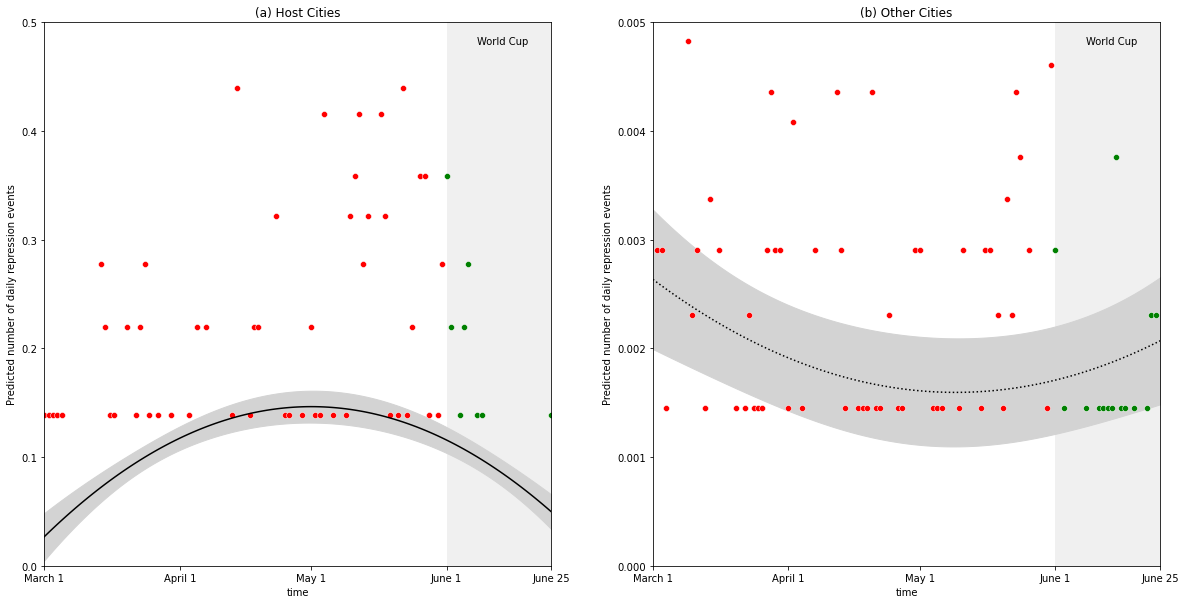


Note: Calculation are based on Model 3, Table 1, with control variables held at observed value. Shading around lines gives 95% confidence intervals.



In [64]:
print()
print('                                               \033[1mFIGURE 5.  Substantive Effects\033[1m')
print('-----------------------------------------------------------------------------------------------------------------------')

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.lineplot(data=fig5_df_a, x='time', y='fittedvalues', color='black', ax=ax1)


ax1.set_ylim(0, 0.5)
ax1.set_xlim(df2['time'].min(), df2['time'].max())
ax1.set_xticks([0.01, 0.32, 0.62, 0.93, 1.17])
ax1.set_xticklabels(['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])
ax1.axvspan(0.93, 1.17, color='#F0F0F0')
ax1.text(x=1, y=0.48, s='World Cup')
ax1.fill_between(x=fig5_df_a.index, y1=fig5_df_a['mean_ci_upper'], y2=fig5_df_a['mean_ci_lower'], color='#D3D3D3')
ax1.set_xlabel('')
ax1.set_ylabel('Predicted number of daily repression events')
ax1.set_title('(a) Host Cities')

sns.scatterplot(data=fig5_df_a[(fig5_df_a.index < 0.93) & (fig5_df_a['lnrepression'] != 0)], x='time', y='lnrepression', color='red', ax=ax1)
sns.scatterplot(data=fig5_df_a[(fig5_df_a.index >= 0.93) & (fig5_df_a['lnrepression'] != 0)], x='time', y='lnrepression', color='green', ax=ax1)


sns.lineplot(data=fig5_df_b, x='time', y='fittedvalues', linestyle='dotted', color='black', ax=ax2)

ax2.set_ylim(0, 0.005)
ax2.set_xlim(df2['time'].min(), df2['time'].max())
ax2.set_xticks([0.01, 0.32, 0.62, 0.93, 1.17])
ax2.set_xticklabels(['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])
ax2.axvspan(0.93, 1.17, color='#F0F0F0')
ax2.text(x=1, y=0.0048, s='World Cup')
ax2.fill_between(x=fig5_df_b.index, y1=fig5_df_b['mean_ci_upper'], y2=fig5_df_b['mean_ci_lower'], color='#D3D3D3')
ax2.set_xlabel('')
ax2.set_ylabel('Predicted number of daily repression events')
ax2.set_title('(b) Other Cities')

sns.scatterplot(data=fig5_df_b[(fig5_df_b.index < 0.93) & (fig5_df_b['lnrepression'] != 0)], x='time', y='lnrepression', color='red', ax=ax2)
sns.scatterplot(data=fig5_df_b[(fig5_df_b.index >= 0.93) & (fig5_df_b['lnrepression'] != 0)], x='time', y='lnrepression', color='green', ax=ax2)


plt.show()

print()
print('\033[1mNote:\033[0m Calculation are based on Model 3, Table 1, with control variables held at observed value. Shading around lines gives 95% confidence intervals.')
print()

With the goal of further highlighting the two hypothesis formed by the authors, we create two new plots which depict the sum of the daily mean of repression events recorded each month prior and during the world cup.

In order to do that we create bins corresponding to each month and using the *sum()* function to get said sum. 

In [65]:
bins=[0.0, 0.32, 0.62, 0.93, 1.17]
fig5_df_b['month'] = pd.cut(fig5_df_b.index, bins)
fig5_df_a['month'] = pd.cut(fig5_df_a.index, bins)
a = fig5_df_a.groupby('month').sum()
b = fig5_df_b.groupby('month').sum()
a['month_a'] = [1, 2, 3, 4]
b['month_b'] = [1, 2, 3, 4]
a=a[['lnrepression', 'month_a']]
b=b[['lnrepression', 'month_b']]

We also add a *host* column indicating whether said sum corresponds to a host city or not and a *month* column indicating the month of the events.

In [66]:
c = pd.concat([a, b], ignore_index=True)
c['host'] = ['Host Cities', 'Host Cities', 'Host Cities', 'Host Cities', 'Non-Host Cities', 'Non-Host Cities', 'Non-Host Cities', 'Non-Host Cities']
c['month'] = [0.32, 0.62, 0.93, 1.17, 0.32, 0.62, 0.93, 1.17]
c

,lnrepression,month_a,month_b,host,month
0,2.738609,1.0,NaN,Host Cities,0.32
1,2.691721,2.0,NaN,Host Cities,0.62
2,6.108085,3.0,NaN,Host Cities,0.93
3,1.271222,4.0,NaN,Host Cities,1.17
4,0.069592,NaN,1.0,Non-Host Cities,0.32
5,0.050224,NaN,2.0,Non-Host Cities,0.62
6,0.069397,NaN,3.0,Non-Host Cities,0.93
7,0.029557,NaN,4.0,Non-Host Cities,1.17


By observing the following plots it is quite clear that hypothesis (1) and (2) are validated by the significant difference in the amount of repression events recorded between host and non-host cities (vertical differnce) as well as the slope difference in the lineplots.

For non-host cities the line remains steady and low while ever so slightly decreasing as we enter the world cup period, indicating no change in appearance of repression events with respect to the time period.

For host cities we see a significant rise in repression events the closer we get to the world cup and then a huge sudden drop when entering the world cup period, indicating a spike in repression events before the world cup and a cease of those activities as soon as it started.

Last but not least the sudden peak in repression during May (one month before the World cup) within host cities may suggest that in order to prevent domestic resistance from the sudden rise of repression in the months prior and with the world cup being right around the corner the military dictatorship preemptively cleared the host areas shortly before the arrival of foreign reporters.


                    Difference in repression events observed within Host and Non-Host cities per month.



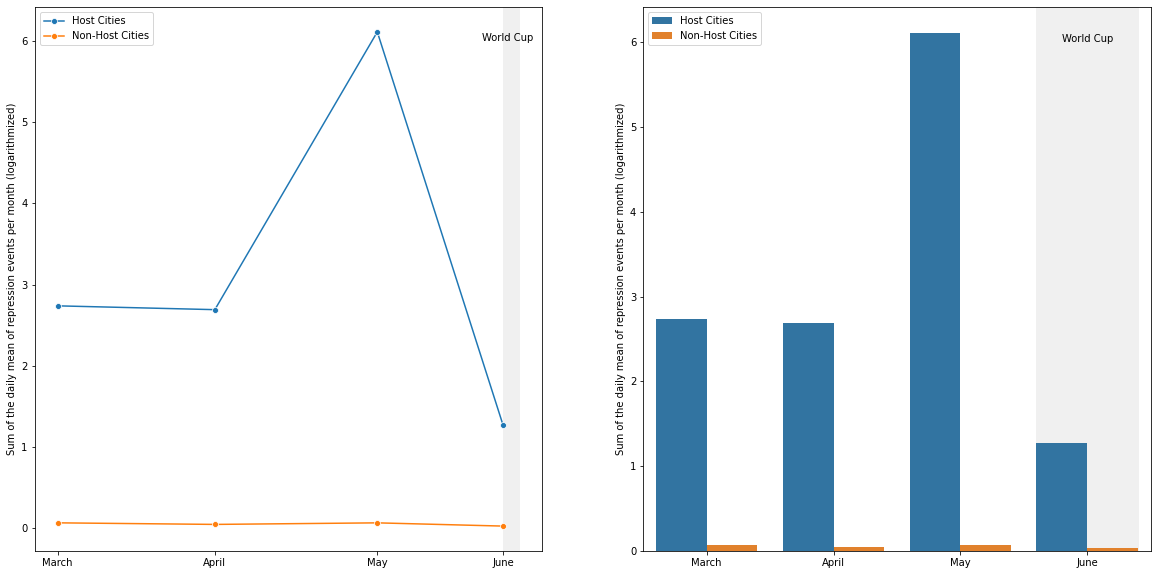


Note: Calculations were made using the mean of logarithmized repression events per day,
in order to retain the numbers scale in a smaller range.



In [67]:
print()
print('                    \033[1mDifference in repression events observed within Host and Non-Host cities per month.\033[1m')
print()
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvspan(1.17, 1.2, color='#F0F0F0')
ax2.axvspan(2.6, 3.4, color='#F0F0F0')

sns.lineplot(data=c[c['host']=='Host Cities'], x='month', y='lnrepression', label='Host Cities', marker='o', ax=ax1)
sns.lineplot(data=c[c['host']=='Non-Host Cities'], x='month', y='lnrepression', label='Non-Host Cities', marker='o', ax=ax1)

sns.barplot(data=c, x='month', y='lnrepression', hue='host', ax=ax2)

ax1.set_xticks([0.32, 0.62, 0.93, 1.17])
ax1.set_xticklabels(['March', 'April', 'May', 'June'])
ax1.legend(loc=2)
ax2.legend(loc=2)
ax2.set_xticklabels(['March', 'April', 'May', 'June'])
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('Sum of the daily mean of repression events per month (logarithmized)')
ax2.set_ylabel('Sum of the daily mean of repression events per month (logarithmized)')
ax1.text(x=1.13, y=6, s='World Cup')
ax2.text(x=2.8, y=6, s='World Cup')

plt.show()
print()
print('\033[1mNote:\033[0m Calculations were made using the mean of logarithmized repression events per day,\nin order to retain the numbers scale in a smaller range.')
print()

Delete the DataFrames used for computanional resourses.

In [68]:
del a, b, c, fig5_df_a, fig5_df_b

---

## 4) Robustness Check Using a Dichotomous Indicator of Repression

---

We create the first model of the Table SI.4.5.

In [69]:
model1 = smf.logit(formula='dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', data=df2)
res1 = model1.fit(cov_type='HC0')
res1.summary()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        01:38:11   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:                  HC0   LLR p-value:                 4.467e-85
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.8507      0.267    -21.934      0.000      -6.373      -5.328
hostcitytime      4.1403      2.081      1.990      0.047       0.062       8.219
hostcitytime2    -3.2143      1.600     -2.009      0.045      -6.350      -0.078
hostcity          3.1376      0.576      5.448      0.000       2.009       4.266
time             -0.8733      1.067     -0.818      0.413      -2.966       1.219
time2             0.5355      0.864      0.620      0.535      -1.157       2.228
=================================================================================
"""

We create the second model of the Table SI.4.5.

In [70]:
model2 = smf.logit(formula='dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', data=df2)
res2 = model2.fit(cov_type='HC0')
res2.summary()

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56383
Method:                           MLE   Df Model:                           10
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.4027
Time:                        01:38:11   Log-Likelihood:                -779.73
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC0   LLR p-value:                1.601e-219
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -17.2479      3.181     -5.422      0.000     -23.482     -11.013
hostcitytime          4.8685      2.119      2.297      0.022       0.715       9.023
hostcitytime2        -3.7977      1.647     -2.305      0.021      -7.026      -0.569
hostcity             -1.6274      0.628     -2.591      0.010      -2.859      -0.396
time                 -0.9927      1.088     -0.912      0.362      -3.126       1.140
time2                 0.6181      0.882      0.701      0.484      -1.111       2.347
lnpop_1970            0.8683      0.224      3.875      0.000       0.429       1.308
vote_frejuli          0.0061      0.014      0.450      0.653      -0.020       0.033
literacy_avg         -0.2055      3.172     -0.065      0.948      -6.422       6.011
lnrebact1974          0.0486      0.078      0.626      0.531      -0.104       0.201
lnrepression70_77     0.5776      0.141      4.100      0.000       0.301       0.854
=====================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We create the third model of the Table SI.4.5.

In [71]:
model3 = smf.logit(formula='dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5', data=df2)
res3 = model3.fit(cov_type='HC0')
res3.summary()

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56379
Method:                           MLE   Df Model:                           14
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.4138
Time:                        01:38:11   Log-Likelihood:                -765.25
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  HC0   LLR p-value:                9.017e-222
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.4018      3.161     -4.873      0.000     -21.597      -9.207
hostcitytime          5.3781      2.267      2.373      0.018       0.935       9.821
hostcitytime2        -4.2173      1.774     -2.378      0.017      -7.694      -0.741
hostcity             -1.3273      0.690     -1.924      0.054      -2.679       0.025
time                 -0.9924      1.086     -0.914      0.361      -3.121       1.136
time2                 0.6179      0.880      0.702      0.483      -1.107       2.343
lnpop_1970            0.7459      0.215      3.470      0.001       0.325       1.167
vote_frejuli          0.0200      0.015      1.323      0.186      -0.010       0.050
literacy_avg         -0.1268      3.041     -0.042      0.967      -6.088       5.834
lnrebact1974         -0.1315      0.080     -1.635      0.102      -0.289       0.026
lnrepression70_77     0.5452      0.155      3.519      0.000       0.242       0.849
zone2                -1.9991      0.450     -4.445      0.000      -2.881      -1.118
zone3                -0.9832      0.272     -3.610      0.000      -1.517      -0.449
zone4                -0.1626      0.260     -0.625      0.532      -0.673       0.347
zone5                -0.7864      0.485     -1.623      0.105      -1.736       0.163
=====================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We create the fourth model of the Table SI.4.5.

In [72]:
model4 = smf.ols(formula='dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', data=df2)
res4 = model4.fit(cov_type='HC0')
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     15.66
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.94e-15
Time:                        01:38:11   Log-Likelihood:                 84143.
No. Observations:               58107   AIC:                        -1.683e+05
Df Residuals:                   58101   BIC:                        -1.682e+05
Df Model:                           5                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0028      0.001      4.137      0.000       0.001       0.004
hostcitytime      0.3184      0.158      2.017      0.044       0.009       0.628
hostcitytime2    -0.2616      0.121     -2.160      0.031      -0.499      -0.024
hostcity          0.0505      0.041      1.247      0.213      -0.029       0.130
time             -0.0021      0.003     -0.808      0.419      -0.007       0.003
time2             0.0013      0.002      0.637      0.524      -0.003       0.005
==============================================================================
Omnibus:                   114009.579   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        181595523.133
Skew:                          16.100   Prob(JB):                         0.00
Kurtosis:                     274.970   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

We create the fifth model of the Table SI.4.5.

In [73]:
model5 = smf.ols(formula='dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', data=df2)
res5 = model5.fit(cov_type='HC0')
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     19.78
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           5.46e-37
Time:                        01:38:11   Log-Likelihood:                 81421.
No. Observations:               56394   AIC:                        -1.628e+05
Df Residuals:                   56383   BIC:                        -1.627e+05
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0053      0.002     -2.406      0.016      -0.010      -0.001
hostcitytime          0.3186      0.156      2.036      0.042       0.012       0.625
hostcitytime2        -0.2617      0.120     -2.180      0.029      -0.497      -0.026
hostcity              0.0219      0.040      0.547      0.584      -0.057       0.100
time                 -0.0023      0.003     -0.886      0.376      -0.007       0.003
time2                 0.0014      0.002      0.707      0.480      -0.003       0.005
lnpop_1970            0.0012      0.000      5.808      0.000       0.001       0.002
vote_frejuli      -4.456e-05   1.96e-05     -2.275      0.023   -8.29e-05   -6.17e-06
literacy_avg         -0.0066      0.001     -5.258      0.000      -0.009      -0.004
lnrebact1974         -0.0002      0.000     -1.260      0.208      -0.000    9.86e-05
lnrepression70_77     0.0048      0.000     11.307      0.000       0.004       0.006
==============================================================================
Omnibus:                   108642.238   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        155981025.969
Skew:                          15.483   Prob(JB):                         0.00
Kurtosis:                     258.779   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the sixth model of the Table SI.4.5.

In [74]:
model6 = smf.ols(formula='dumrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5', data=df2)
res6 = model6.fit(cov_type='HC0')
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.46
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.10e-35
Time:                        01:38:12   Log-Likelihood:                 81565.
No. Observations:               56394   AIC:                        -1.631e+05
Df Residuals:                   56379   BIC:                        -1.630e+05
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0050      0.003     -1.881      0.060      -0.010       0.000
hostcitytime          0.3186      0.155      2.055      0.040       0.015       0.622
hostcitytime2        -0.2617      0.119     -2.199      0.028      -0.495      -0.028
hostcity              0.0219      0.040      0.552      0.581      -0.056       0.100
time                 -0.0023      0.003     -0.885      0.376      -0.007       0.003
time2                 0.0014      0.002      0.707      0.480      -0.003       0.005
lnpop_1970            0.0038      0.000      9.168      0.000       0.003       0.005
vote_frejuli      -1.441e-06   2.68e-05     -0.054      0.957    -5.4e-05    5.11e-05
literacy_avg         -0.0266      0.003     -9.848      0.000      -0.032      -0.021
lnrebact1974         -0.0016      0.000     -7.786      0.000      -0.002      -0.001
lnrepression70_77     0.0037      0.000      8.777      0.000       0.003       0.005
zone2                -0.0165      0.002    -10.426      0.000      -0.020      -0.013
zone3                -0.0129      0.001     -9.587      0.000      -0.016      -0.010
zone4                -0.0071      0.005     -1.510      0.131      -0.016       0.002
zone5                -0.0102      0.001     -9.863      0.000      -0.012      -0.008
==============================================================================
Omnibus:                   108296.025   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153317250.667
Skew:                          15.376   Prob(JB):                         0.00
Kurtosis:                     256.580   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now again we create 12 lists.

The first six corresponds to the models' coefficients with their robust standard errors and the last six to their p values respectively.

[ coeff1, error1, coeff2, error2, coeff3, error3, coeff4, error4, ... ] 

[ pval1, pval2, pval3, pval4, ... ]

In [75]:
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data1p = []
data2p = []
data3p = []
data4p = []
data5p = []
data6p = []

In [76]:
data1.extend([res1.params[1], res1.bse[1], res1.params[2], res1.bse[2], res1.params[3], res1.bse[3], res1.params[4], res1.bse[4], res1.params[5], res1.bse[5], res1.params[0], res1.bse[0], np.NaN, np.NaN, 666, res1.prsquared, np.NaN, np.NaN, int(res1.nobs)])
data2.extend([res2.params[1], res2.bse[1], res2.params[2], res2.bse[2], res2.params[3], res2.bse[3], res2.params[4], res2.bse[4], res2.params[5], res2.bse[5], res2.params[0], res2.bse[0], np.NaN, np.NaN, 666, res2.prsquared, np.NaN, np.NaN, int(res2.nobs)])
data3.extend([res3.params[1], res3.bse[1], res3.params[2], res3.bse[2], res3.params[3], res3.bse[3], res3.params[4], res3.bse[4], res3.params[5], res3.bse[5], res3.params[0], res3.bse[0], np.NaN, np.NaN, 666, res3.prsquared, np.NaN, np.NaN, int(res3.nobs)])

data4.extend([res4.params[1], res4.bse[1], res4.params[2], res4.bse[2], res4.params[3], res4.bse[3], res4.params[4], res4.bse[4], res4.params[5], res4.bse[5], res4.params[0], res4.bse[0], np.NaN, np.NaN, np.NaN, np.NaN, res4.fvalue, res4.rsquared, int(res4.nobs)])
data5.extend([res5.params[1], res5.bse[1], res5.params[2], res5.bse[2], res5.params[3], res5.bse[3], res5.params[4], res5.bse[4], res5.params[5], res5.bse[5], res5.params[0], res5.bse[0], np.NaN, np.NaN, np.NaN, np.NaN, res5.fvalue, res5.rsquared, int(res5.nobs)])
data6.extend([res6.params[1], res6.bse[1], res6.params[2], res6.bse[2], res6.params[3], res6.bse[3], res6.params[4], res6.bse[4], res6.params[5], res6.bse[5], res6.params[0], res6.bse[0], np.NaN, np.NaN, np.NaN, np.NaN, res6.fvalue, res6.rsquared, int(res6.nobs)])

data2

[4.868549027407976,
 2.1194251115613696,
 -3.7977197321241585,
 1.6472997920074819,
 -1.6273951342034334,
 0.6281273936944507,
 -0.9927205730968267,
 1.08827668207054,
 0.6180767457897778,
 0.8821599304278946,
 -17.247855951734397,
 3.1809791189769965,
 nan,
 nan,
 666,
 0.4026958487727761,
 nan,
 nan,
 56394]

In [77]:
data1p.extend([res1.pvalues[1], res1.pvalues[2], res1.pvalues[3], res1.pvalues[4], res1.pvalues[5], res1.pvalues[0], 0.00001])
data2p.extend([res2.pvalues[1], res2.pvalues[2], res2.pvalues[3], res2.pvalues[4], res2.pvalues[5], res2.pvalues[0], 0.00001])
data3p.extend([res3.pvalues[1], res3.pvalues[2], res3.pvalues[3], res3.pvalues[4], res3.pvalues[5], res3.pvalues[0], 0.00001])
data4p.extend([res4.pvalues[1], res4.pvalues[2], res4.pvalues[3], res4.pvalues[4], res4.pvalues[5], res4.pvalues[0], res4.f_pvalue])
data5p.extend([res5.pvalues[1], res5.pvalues[2], res5.pvalues[3], res5.pvalues[4], res5.pvalues[5], res5.pvalues[0], res5.f_pvalue])
data6p.extend([res6.pvalues[1], res6.pvalues[2], res6.pvalues[3], res6.pvalues[4], res6.pvalues[5], res6.pvalues[0], res6.f_pvalue])
data2p

[0.021612592077737528,
 0.021142999764190734,
 0.009573421764557796,
 0.36166606341515994,
 0.4835275588454332,
 5.887503912586195e-08,
 1e-05]

Now we will once again pass them through the functions we defined before.

roundData --> Rounds the data and makes it a string.

addStandardErrors --> Concatenates the coefficient with its standard error into a single variable divided by /n.

check_p_values --> Adds the appropriate symbol that represents the range of the p value.

In [78]:
roundData(data1)
roundData(data2)
roundData(data3)
roundData(data4)
roundData(data5)
roundData(data6)
data2

['4.869',
 '2.119',
 '-3.798',
 '1.647',
 '-1.627',
 '0.628',
 '-0.993',
 '1.088',
 '0.618',
 '0.882',
 '-17.248',
 '3.181',
 'nan',
 'nan',
 '666',
 '0.4',
 'nan',
 'nan',
 '56394']

In [79]:
check_p_values(data1, data1p)
check_p_values(data2, data2p)
check_p_values(data3, data3p)
check_p_values(data4, data4p, True)
check_p_values(data5, data5p, True)
check_p_values(data6, data6p, True)
data2

['4.869*',
 '2.119',
 '-3.798*',
 '1.647',
 '-1.627**',
 '0.628',
 '-0.993',
 '1.088',
 '0.618',
 '0.882',
 '-17.248***',
 '3.181',
 'nan',
 'nan',
 '666***',
 '0.4',
 'nan',
 'nan',
 '56394']

In [80]:
addStandardErrors(data1)
addStandardErrors(data2)
addStandardErrors(data3)
addStandardErrors(data4)
addStandardErrors(data5)
addStandardErrors(data6)
data2

['4.869*\n(2.119)',
 '-3.798*\n(1.647)',
 '-1.627**\n(0.628)',
 '-0.993\n(1.088)',
 '0.618\n(0.882)',
 '-17.248***\n(3.181)',
 'nan',
 'nan',
 '666***',
 '0.4',
 'nan',
 'nan',
 '56394']

In [81]:
data6

['0.319*\n(0.155)',
 '-0.262*\n(0.119)',
 '0.022\n(0.04)',
 '-0.002\n(0.003)',
 '0.001\n(0.002)',
 '-0.005+\n(0.003)',
 'nan',
 'nan',
 'nan',
 'nan',
 '14.46***',
 '0.06',
 '56394']

Finally we create a new DataFrame object that will be the final table, using the data dictionary to set the columns and their values respectively whilst using the *cols* list elements as the indexes.

In [82]:
cols = ['Host City * Time', 'Host City * Time2', 'Host City', 'Time', 'Time2', 'Constant', 'Controls', 'Zone FE', 'Wald Chi-Squared', 'Pseudo R Squared', 'F Statistic', 'R Squared', 'Observations']
data = {'(1)' : data1,
        '(2)' : data2,
        '(3)' : data3,
        '(4)' : data4,
        '(5)' : data5,
        '(6)' : data6,}
df_SI_4_5 = pd.DataFrame(data=data, index=cols, columns = ['(1)', '(2)', '(3)', '(4)', '(5)', '(6)'])

df_SI_4_5.iloc[6] = ['✘', '✔', '✔', '✘', '✔', '✔']
df_SI_4_5.iloc[7] = ['✘', '✘', '✔', '✘', '✘', '✔']

df_SI_4_5.loc['F Statistic'][:3] = ''
df_SI_4_5.loc['R Squared'][:3] = ''

df_SI_4_5.loc['Wald Chi-Squared'][:] = ''
df_SI_4_5.loc['Pseudo R Squared'][3:] = ''

print('\n\033[1m Table SI.4.5.\033[0m Regression results for binary variable of repression.')
print(' \n                --------- Logit ------- ------- OLS ---------')
pretty_print(df_SI_4_5)
print('\033[1m Note:\033[0m Values are coefficients with robust standard errors in parentheses. \n { + : p<0.1, * : p<0.05, ** : p<0.01, *** : p<0.001 }')


 Table SI.4.5. Regression results for binary variable of repression.
 
                --------- Logit ------- ------- OLS ---------


,(1),(2),(3),(4),(5),(6)
Host City * Time,4.14*(2.081),4.869*(2.119),5.378*(2.267),0.318*(0.158),0.319*(0.156),0.319*(0.155)
Host City * Time2,-3.214*(1.6),-3.798*(1.647),-4.217*(1.774),-0.262*(0.121),-0.262*(0.12),-0.262*(0.119)
Host City,3.138***(0.576),-1.627**(0.628),-1.327+(0.69),0.051(0.041),0.022(0.04),0.022(0.04)
Time,-0.873(1.067),-0.993(1.088),-0.992(1.086),-0.002(0.003),-0.002(0.003),-0.002(0.003)
Time2,0.535(0.864),0.618(0.882),0.618(0.88),0.001(0.002),0.001(0.002),0.001(0.002)
Constant,-5.851***(0.267),-17.248***(3.181),-15.402***(3.161),0.003***(0.001),-0.005*(0.002),-0.005+(0.003)
Controls,✘,✔,✔,✘,✔,✔
Zone FE,✘,✘,✔,✘,✘,✔
Wald Chi-Squared,,,,,,
Pseudo R Squared,0.15,0.4,0.41,,,


 Note: Values are coefficients with robust standard errors in parentheses. 
 { + : p<0.1, * : p<0.05, ** : p<0.01, *** : p<0.001 }


---

## 5) Robustness Check Using Matched Samples

---

We create the first model of Table SI.4.7.

In [83]:
model1 = smf.ols("lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2", data=df2.loc[df2.matched_simple==1])
res1 = model1.fit(cov_type="HC0")
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.566
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.40e-08
Time:                        01:38:12   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0292      0.008      3.449      0.001       0.013       0.046
hostcitytime      0.4239      0.148      2.870      0.004       0.134       0.713
hostcitytime2    -0.3405      0.113     -3.007      0.003      -0.562      -0.119
hostcity         -0.0064      0.035     -0.182      0.856      -0.075       0.063
time             -0.0255      0.031     -0.811      0.417      -0.087       0.036
time2             0.0196      0.025      0.785      0.432      -0.029       0.068
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

We create the second model of Table SI.4.7.

In [84]:
model2 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', data=df2.loc[df2['matched_simple'] == 1])
res2 = model2.fit(cov_type='HC0')
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.93
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.55e-22
Time:                        01:38:12   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9371      0.140     -6.677      0.000      -1.212      -0.662
hostcitytime          0.4239      0.135      3.137      0.002       0.159       0.689
hostcitytime2        -0.3405      0.105     -3.254      0.001      -0.546      -0.135
hostcity             -0.1001      0.035     -2.900      0.004      -0.168      -0.032
time                 -0.0255      0.031     -0.818      0.413      -0.087       0.036
time2                 0.0196      0.025      0.790      0.430      -0.029       0.068
lnpop_1970            0.0867      0.011      8.229      0.000       0.066       0.107
vote_frejuli         -0.0014      0.001     -2.736      0.006      -0.002      -0.000
literacy_avg          0.0089      0.087      0.102      0.919      -0.162       0.180
lnrebact1974         -0.0049      0.002     -2.794      0.005      -0.008      -0.001
lnrepression70_77    -0.0029      0.002     -1.298      0.194      -0.007       0.002
==============================================================================
Omnibus:                     4103.436   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186868.735
Skew:                           5.032   Prob(JB):                         0.00
Kurtosis:                      34.527   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the third model of Table SI.4.7.

In [85]:
model3 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5', data=df2.loc[df2['matched_simple'] == 1])
res3 = model3.fit(cov_type='HC0')
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.52
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           7.65e-24
Time:                        01:38:12   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9783      0.171     -5.711      0.000      -1.314      -0.643
hostcitytime          0.4239      0.131      3.247      0.001       0.168       0.680
hostcitytime2        -0.3405      0.102     -3.350      0.001      -0.540      -0.141
hostcity             -0.0766      0.033     -2.351      0.019      -0.141      -0.013
time                 -0.0255      0.031     -0.820      0.412      -0.087       0.035
time2                 0.0196      0.025      0.791      0.429      -0.029       0.068
lnpop_1970            0.0872      0.011      7.775      0.000       0.065       0.109
vote_frejuli         -0.0009      0.001     -1.578      0.115      -0.002       0.000
literacy_avg          0.2092      0.102      2.049      0.040       0.009       0.409
lnrebact1974         -0.0204      0.003     -6.653      0.000      -0.026      -0.014
lnrepression70_77    -0.0160      0.004     -4.176      0.000      -0.024      -0.008
zone2                -0.1095      0.013     -8.715      0.000      -0.134      -0.085
zone3                -0.0857      0.011     -7.653      0.000      -0.108      -0.064
zone4                -0.0162      0.009     -1.858      0.063      -0.033       0.001
zone5                -0.0682      0.010     -6.647      0.000      -0.088      -0.048
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.357
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the fourth model of Table SI.4.7.

In [86]:
model4 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', data=df2.loc[df2['matched_allhosts'] == 1])
res4 = model4.fit(cov_type='HC0')
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.543
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.43e-05
Time:                        01:38:12   Log-Likelihood:                 129.20
No. Observations:                2223   AIC:                            -246.4
Df Residuals:                    2217   BIC:                            -212.2
Df Model:                           5                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0581      0.017      3.402      0.001       0.025       0.092
hostcitytime      0.4654      0.157      2.966      0.003       0.158       0.773
hostcitytime2    -0.3677      0.120     -3.056      0.002      -0.603      -0.132
hostcity         -0.0354      0.038     -0.926      0.354      -0.110       0.039
time             -0.0670      0.062     -1.088      0.276      -0.188       0.054
time2             0.0467      0.048      0.981      0.327      -0.047       0.140
==============================================================================
Omnibus:                     1927.744   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42862.975
Skew:                           4.210   Prob(JB):                         0.00
Kurtosis:                      22.795   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

We create the fifth model of Table SI.4.7.

In [87]:
model5 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', data=df2.loc[df2['matched_allhosts'] == 1])
res5 = model5.fit(cov_type='HC0')
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     10.29
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.87e-17
Time:                        01:38:12   Log-Likelihood:                 242.42
No. Observations:                2223   AIC:                            -462.8
Df Residuals:                    2212   BIC:                            -400.1
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8412      0.330     -5.588      0.000      -2.487      -1.195
hostcitytime          0.4654      0.142      3.287      0.001       0.188       0.743
hostcitytime2        -0.3677      0.111     -3.323      0.001      -0.585      -0.151
hostcity             -0.1593      0.040     -3.945      0.000      -0.239      -0.080
time                 -0.0670      0.061     -1.094      0.274      -0.187       0.053
time2                 0.0467      0.047      0.984      0.325      -0.046       0.140
lnpop_1970            0.1348      0.018      7.675      0.000       0.100       0.169
vote_frejuli         -0.0029      0.001     -2.721      0.007      -0.005      -0.001
literacy_avg          0.6144      0.277      2.215      0.027       0.071       1.158
lnrebact1974         -0.0171      0.006     -3.077      0.002      -0.028      -0.006
lnrepression70_77    -0.0172      0.006     -2.944      0.003      -0.029      -0.006
==============================================================================
Omnibus:                     1797.738   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36636.153
Skew:                           3.809   Prob(JB):                         0.00
Kurtosis:                      21.371   Cond. No.                     5.36e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the sixth model of Table SI.4.7.

In [88]:
model6 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5', data=df2.loc[df2['matched_allhosts'] == 1])
res6 = model6.fit(cov_type='HC0')
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     11.98
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.68e-27
Time:                        01:38:12   Log-Likelihood:                 273.97
No. Observations:                2223   AIC:                            -517.9
Df Residuals:                    2208   BIC:                            -432.3
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6046      0.333     -1.813      0.070      -1.258       0.049
hostcitytime          0.4654      0.138      3.378      0.001       0.195       0.735
hostcitytime2        -0.3677      0.108     -3.390      0.001      -0.580      -0.155
hostcity             -0.1286      0.039     -3.332      0.001      -0.204      -0.053
time                 -0.0670      0.061     -1.100      0.271      -0.186       0.052
time2                 0.0467      0.047      0.991      0.322      -0.046       0.139
lnpop_1970            0.1096      0.016      6.781      0.000       0.078       0.141
vote_frejuli         -0.0021      0.001     -1.958      0.050      -0.004    2.03e-06
literacy_avg         -0.1811      0.297     -0.610      0.542      -0.762       0.400
lnrebact1974         -0.0710      0.013     -5.371      0.000      -0.097      -0.045
lnrepression70_77    -0.0177      0.006     -2.818      0.005      -0.030      -0.005
zone2                -0.1731      0.025     -6.812      0.000      -0.223      -0.123
zone3                -0.1857      0.031     -5.973      0.000      -0.247      -0.125
zone4                -0.0206      0.011     -1.897      0.058      -0.042       0.001
zone5                -0.0066      0.013     -0.520      0.603      -0.031       0.018
==============================================================================
Omnibus:                     1758.814   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35516.615
Skew:                           3.685   Prob(JB):                         0.00
Kurtosis:                      21.142   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the seventh model of Table SI.4.7.

In [89]:
model7 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2', data=df2.loc[df2['matched_nocapfed'] == 1])
res7 = model7.fit(cov_type='HC0')
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     3.255
Date:                Tue, 20 Dec 2022   Prob (F-statistic):            0.00630
Time:                        01:38:12   Log-Likelihood:                 373.23
No. Observations:                1404   AIC:                            -734.5
Df Residuals:                    1398   BIC:                            -703.0
Df Model:                           5                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0365      0.022      1.672      0.094      -0.006       0.079
hostcitytime      0.1888      0.115      1.635      0.102      -0.038       0.415
hostcitytime2    -0.1659      0.091     -1.833      0.067      -0.343       0.011
hostcity         -0.0414      0.028     -1.469      0.142      -0.097       0.014
time              0.0144      0.084      0.170      0.865      -0.151       0.180
time2            -0.0075      0.066     -0.114      0.910      -0.137       0.122
==============================================================================
Omnibus:                     1400.118   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45368.483
Skew:                           4.990   Prob(JB):                         0.00
Kurtosis:                      28.999   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

We create the eighth model of Table SI.4.7.

In [90]:
model8 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77', data=df2.loc[df2['matched_nocapfed'] == 1])
res8 = model8.fit(cov_type='HC0')
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.249
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.31e-07
Time:                        01:38:12   Log-Likelihood:                 385.54
No. Observations:                1404   AIC:                            -749.1
Df Residuals:                    1393   BIC:                            -691.4
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2970      0.479      0.620      0.535      -0.642       1.236
hostcitytime          0.1888      0.115      1.647      0.100      -0.036       0.413
hostcitytime2        -0.1659      0.090     -1.849      0.064      -0.342       0.010
hostcity             -0.0333      0.034     -0.978      0.328      -0.100       0.033
time                  0.0144      0.083      0.173      0.863      -0.148       0.177
time2                -0.0075      0.065     -0.116      0.908      -0.135       0.120
lnpop_1970           -0.0196      0.014     -1.382      0.167      -0.047       0.008
vote_frejuli          0.0027      0.001      1.802      0.072      -0.000       0.006
literacy_avg         -0.2986      0.475     -0.628      0.530      -1.231       0.633
lnrebact1974          0.0022      0.008      0.282      0.778      -0.013       0.018
lnrepression70_77     0.0182      0.008      2.193      0.028       0.002       0.034
==============================================================================
Omnibus:                     1374.148   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42285.041
Skew:                           4.860   Prob(JB):                         0.00
Kurtosis:                      28.066   Cond. No.                     7.16e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 7.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We create the nineth model of Table SI.4.7.

In [91]:
model9 = smf.ols(formula='lnrepression ~ hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone2 + zone3 + zone4 + zone5', data=df2.loc[df2['matched_nocapfed'] == 1])
res9 = model9.fit(cov_type='HC0')
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.692
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.91e-08
Time:                        01:38:12   Log-Likelihood:                 390.61
No. Observations:                1404   AIC:                            -751.2
Df Residuals:                    1389   BIC:                            -672.5
Df Model:                          14                                         
Covariance Type:                  HC0                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3632      0.576      0.631      0.528      -0.765       1.491
hostcitytime          0.1888      0.114      1.654      0.098      -0.035       0.413
hostcitytime2        -0.1659      0.089     -1.854      0.064      -0.341       0.009
hostcity             -0.0338      0.037     -0.905      0.366      -0.107       0.039
time                  0.0144      0.083      0.174      0.862      -0.147       0.176
time2                -0.0075      0.065     -0.116      0.908      -0.135       0.120
lnpop_1970           -0.0708      0.120     -0.588      0.556      -0.307       0.165
vote_frejuli          0.0042      0.006      0.682      0.496      -0.008       0.016
literacy_avg          0.0801      1.215      0.066      0.947      -2.301       2.461
lnrebact1974          0.0275      0.069      0.398      0.690      -0.108       0.163
lnrepression70_77     0.0323      0.034      0.937      0.349      -0.035       0.100
zone2                 0.0280      0.141      0.198      0.843      -0.249       0.305
zone3                 0.0547      0.196      0.279      0.780      -0.330       0.439
zone4                -0.0307      0.018     -1.671      0.095      -0.067       0.005
zone5                -0.0754      0.047     -1.606      0.108      -0.167       0.017
==============================================================================
Omnibus:                     1364.661   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41410.044
Skew:                           4.811   Prob(JB):                         0.00
Kurtosis:                      27.805   Cond. No.                     9.92e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 9.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we create 18 lists.

The first 9 correspond to the model's coefficients with their robust standard errors while the last 9 to their p values respectively.

[ coeff1, error1, coeff2, error2, coeff3, error3, coeff4, error4, ... ] 

[ pval1, pval2, pval3, pval4, ... ]

In [92]:
data1 = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
data7 = []
data8 = []
data9 = []

In [93]:
data1p = []
data2p = []
data3p = []
data4p = []
data5p = []
data6p = []
data7p = []
data8p = []
data9p = []

In [94]:
data1.extend([res1.params[1], res1.bse[1], res1.params[2], res1.bse[2], res1.params[3], res1.bse[3], res1.params[4], res1.bse[4], res1.params[5], res1.bse[5], res1.params[0], res1.bse[0], np.NaN, np.NaN, res1.fvalue, res1.rsquared, int(res1.nobs)])
data2.extend([res2.params[1], res2.bse[1], res2.params[2], res2.bse[2], res2.params[3], res2.bse[3], res2.params[4], res2.bse[4], res2.params[5], res2.bse[5], res2.params[0], res2.bse[0], np.NaN, np.NaN, res2.fvalue, res2.rsquared, int(res2.nobs)])
data3.extend([res3.params[1], res3.bse[1], res3.params[2], res3.bse[2], res3.params[3], res3.bse[3], res3.params[4], res3.bse[4], res3.params[5], res3.bse[5], res3.params[0], res3.bse[0], np.NaN, np.NaN, res3.fvalue, res3.rsquared, int(res3.nobs)])

data4.extend([res4.params[1], res4.bse[1], res4.params[2], res4.bse[2], res4.params[3], res4.bse[3], res4.params[4], res4.bse[4], res4.params[5], res4.bse[5], res4.params[0], res4.bse[0], np.NaN, np.NaN, res4.fvalue, res4.rsquared, int(res4.nobs)])
data5.extend([res5.params[1], res5.bse[1], res5.params[2], res5.bse[2], res5.params[3], res5.bse[3], res5.params[4], res5.bse[4], res5.params[5], res5.bse[5], res5.params[0], res5.bse[0], np.NaN, np.NaN, res5.fvalue, res5.rsquared, int(res5.nobs)])
data6.extend([res6.params[1], res6.bse[1], res6.params[2], res6.bse[2], res6.params[3], res6.bse[3], res6.params[4], res6.bse[4], res6.params[5], res6.bse[5], res6.params[0], res6.bse[0], np.NaN, np.NaN, res6.fvalue, res6.rsquared, int(res6.nobs)])

data7.extend([res7.params[1], res7.bse[1], res7.params[2], res7.bse[2], res7.params[3], res7.bse[3], res7.params[4], res7.bse[4], res7.params[5], res7.bse[5], res7.params[0], res7.bse[0], np.NaN, np.NaN, res7.fvalue, res7.rsquared, int(res7.nobs)])
data8.extend([res8.params[1], res8.bse[1], res8.params[2], res8.bse[2], res8.params[3], res8.bse[3], res8.params[4], res8.bse[4], res8.params[5], res8.bse[5], res8.params[0], res8.bse[0], np.NaN, np.NaN, res8.fvalue, res8.rsquared, int(res8.nobs)])
data9.extend([res9.params[1], res9.bse[1], res9.params[2], res9.bse[2], res9.params[3], res9.bse[3], res9.params[4], res9.bse[4], res9.params[5], res9.bse[5], res9.params[0], res9.bse[0], np.NaN, np.NaN, res9.fvalue, res9.rsquared, int(res9.nobs)])

data4

[0.4654191222793549,
 0.15691259798433949,
 -0.3676527086899363,
 0.12029509032263305,
 -0.03535647842514417,
 0.03817243727453558,
 -0.06702069149165278,
 0.061578993629996887,
 0.046715683577006714,
 0.047619336081797296,
 0.058111878838639455,
 0.01708342906873022,
 nan,
 nan,
 5.5427893140823965,
 0.02349665483547303,
 2223]

In [95]:
data1p.extend([res1.pvalues[1], res1.pvalues[2], res1.pvalues[3], res1.pvalues[4], res1.pvalues[5], res1.pvalues[0], res1.f_pvalue])
data2p.extend([res2.pvalues[1], res2.pvalues[2], res2.pvalues[3], res2.pvalues[4], res2.pvalues[5], res2.pvalues[0], res2.f_pvalue])
data3p.extend([res3.pvalues[1], res3.pvalues[2], res3.pvalues[3], res3.pvalues[4], res3.pvalues[5], res3.pvalues[0], res3.f_pvalue])

data4p.extend([res4.pvalues[1], res4.pvalues[2], res4.pvalues[3], res4.pvalues[4], res4.pvalues[5], res4.pvalues[0], res4.f_pvalue])
data5p.extend([res5.pvalues[1], res5.pvalues[2], res5.pvalues[3], res5.pvalues[4], res5.pvalues[5], res5.pvalues[0], res5.f_pvalue])
data6p.extend([res6.pvalues[1], res6.pvalues[2], res6.pvalues[3], res6.pvalues[4], res6.pvalues[5], res6.pvalues[0], res6.f_pvalue])

data7p.extend([res7.pvalues[1], res7.pvalues[2], res7.pvalues[3], res7.pvalues[4], res7.pvalues[5], res7.pvalues[0], res7.f_pvalue])
data8p.extend([res8.pvalues[1], res8.pvalues[2], res8.pvalues[3], res8.pvalues[4], res8.pvalues[5], res8.pvalues[0], res8.f_pvalue])
data9p.extend([res9.pvalues[1], res9.pvalues[2], res9.pvalues[3], res9.pvalues[4], res9.pvalues[5], res9.pvalues[0], res9.f_pvalue])

data4p

[0.0030159824700672334,
 0.00224119083771238,
 0.3543261676777739,
 0.2764320703932901,
 0.32658119622679427,
 0.0006697989544538351,
 4.4348378483647746e-05]

Then we pass them through each of the functions defined above.

roundData --> Rounds the data and makes it a string.

addStandardErrors --> Concatenates the coefficient with its standard error into a single variable divided by /n.

check_p_values --> Adds the appropriate symbol that represents the range of the p value.

In [96]:
roundData(data1)
roundData(data2)
roundData(data3)

roundData(data4)
roundData(data5)
roundData(data6)

roundData(data7)
roundData(data8)
roundData(data9)

data4

['0.465',
 '0.157',
 '-0.368',
 '0.12',
 '-0.035',
 '0.038',
 '-0.067',
 '0.062',
 '0.047',
 '0.048',
 '0.058',
 '0.017',
 'nan',
 'nan',
 '5.54',
 '0.02',
 '2223']

In [97]:
check_p_values(data1, data1p)
check_p_values(data2, data2p)
check_p_values(data3, data3p)

check_p_values(data4, data4p)
check_p_values(data5, data5p)
check_p_values(data6, data6p)

check_p_values(data7, data7p)
check_p_values(data8, data8p)
check_p_values(data9, data9p)

data4

['0.465**',
 '0.157',
 '-0.368**',
 '0.12',
 '-0.035',
 '0.038',
 '-0.067',
 '0.062',
 '0.047',
 '0.048',
 '0.058***',
 '0.017',
 'nan',
 'nan',
 '5.54***',
 '0.02',
 '2223']

In [98]:
addStandardErrors(data1)
addStandardErrors(data2)
addStandardErrors(data3)

addStandardErrors(data4)
addStandardErrors(data5)
addStandardErrors(data6)

addStandardErrors(data7)
addStandardErrors(data8)
addStandardErrors(data9)

data4

['0.465**\n(0.157)',
 '-0.368**\n(0.12)',
 '-0.035\n(0.038)',
 '-0.067\n(0.062)',
 '0.047\n(0.048)',
 '0.058***\n(0.017)',
 'nan',
 'nan',
 '5.54***',
 '0.02',
 '2223']

Finally we create a new DataFrame object that will be the final table, using the data dictionary to set the columns and their values respectively whilst using the *cols* list elements as the indexes.

In [99]:
cols = ['Host City * Time', 'Host City * Time2', 'Host City', 'Time', 'Time2', 'Constant', 'Controls', 'Zone FE', 'F Statistic', 'R Squared', 'Observations']
data = {'(1)' : data1,
        '(2)' : data2,
        '(3)' : data3,
        '(4)' : data4,
        '(5)' : data5,
        '(6)' : data6,
        '(7)' : data7,
        '(8)' : data8,
        '(9)' : data9,}
df_SI_4_7 = pd.DataFrame(data=data, index=cols, columns = ['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)', '(8)', '(9)'])

df_SI_4_7.iloc[6] = ['✘', '✔', '✔', '✘', '✔', '✔', '✘', '✔', '✔']
df_SI_4_7.iloc[7] = ['✘', '✘', '✔', '✘', '✘', '✔', '✘', '✘', '✔']

print('\n\033[1m Table SI.4.7.\033[0m Linear regressions (OLS) for matched samples.')
print('\n              --- Manual Matching ---   ---- Coarsened -----  ---- Coarsened ---')
print('                                           Exact Matching        Exact Matching      ')
print('                                                               (w/o Buenos Aires)      ')
pretty_print(df_SI_4_7)
print('\033[1m Note:\033[0m Values are coefficients with robust standard errors in parentheses. \n { + : p<0.1, * : p<0.05, ** : p<0.01, *** : p<0.001 }')


 Table SI.4.7. Linear regressions (OLS) for matched samples.

              --- Manual Matching ---   ---- Coarsened -----  ---- Coarsened ---
                                           Exact Matching        Exact Matching      
                                                               (w/o Buenos Aires)      


,(1),(2),(3),(4),(5),(6),(7),(8),(9)
Host City * Time,0.424**(0.148),0.424**(0.135),0.424**(0.131),0.465**(0.157),0.465**(0.142),0.465***(0.138),0.189(0.115),0.189+(0.115),0.189+(0.114)
Host City * Time2,-0.341**(0.113),-0.341**(0.105),-0.341***(0.102),-0.368**(0.12),-0.368***(0.111),-0.368***(0.108),-0.166+(0.091),-0.166+(0.09),-0.166+(0.089)
Host City,-0.006(0.035),-0.1**(0.035),-0.077*(0.033),-0.035(0.038),-0.159***(0.04),-0.129***(0.039),-0.041(0.028),-0.033(0.034),-0.034(0.037)
Time,-0.026(0.031),-0.026(0.031),-0.026(0.031),-0.067(0.062),-0.067(0.061),-0.067(0.061),0.014(0.084),0.014(0.083),0.014(0.083)
Time2,0.02(0.025),0.02(0.025),0.02(0.025),0.047(0.048),0.047(0.047),0.047(0.047),-0.008(0.066),-0.008(0.065),-0.008(0.065)
Constant,0.029***(0.008),-0.937***(0.14),-0.978***(0.171),0.058***(0.017),-1.841***(0.33),-0.605+(0.333),0.036+(0.022),0.297(0.479),0.363(0.576)
Controls,✘,✔,✔,✘,✔,✔,✘,✔,✔
Zone FE,✘,✘,✔,✘,✘,✔,✘,✘,✔
F Statistic,8.57***,12.93***,10.52***,5.54***,10.29***,11.98***,3.25,5.25***,4.69***
R Squared,0.03,0.1,0.12,0.02,0.12,0.14,0.0,0.02,0.03


 Note: Values are coefficients with robust standard errors in parentheses. 
 { + : p<0.1, * : p<0.05, ** : p<0.01, *** : p<0.001 }


From the table above we deduct that the authors' findings are truly robust to various sample compositions and unlikely to be driven by covariate imbalances or model dependencies. Also the direction of the coefficients is as expected.

Something also worth mentioning is that when not including Buenos Aires, the coefficients become statistically insignificant however their direction remains as expected.

(Direction suggests the positive/negative effect they have on the endogenous variable).

Now in order to recreate figure 6 we need to use the third model described in Table SI.4.7.

Using *fittedvalues* we get the predicted values for the original (unwhitened) design.

In [100]:
res3.fittedvalues

863       0.040975
864       0.040725
865       0.040480
866       0.040239
867       0.040001
            ...   
129615   -0.002472
129616   -0.002282
129617   -0.002089
129618   -0.001892
129619   -0.001691
Length: 4095, dtype: float64

Using get_prediction we get the prediction results.

Using summary_frame we get the summary frame of mean, variance and confidence interval.

Using alpha=0.5 we ensure that we get 95% confidence intervals

In [101]:
m3_preds = res3.get_prediction(df2[df2['matched_allhosts'] == 1]).summary_frame(alpha=0.5)
m3_preds

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.071315,0.010477,0.064248,0.078382,-0.043807,0.186436
1,0.071065,0.010261,0.064144,0.077987,-0.044047,0.186178
2,0.070820,0.010052,0.064040,0.077600,-0.044284,0.185924
3,0.070579,0.009851,0.063934,0.077223,-0.044518,0.185675
4,0.070341,0.009658,0.063827,0.076855,-0.044748,0.185430
...,...,...,...,...,...,...
2218,-0.002472,0.009616,-0.008957,0.004014,-0.117559,0.112616
2219,-0.002282,0.009767,-0.008870,0.004306,-0.117375,0.112811
2220,-0.002089,0.009926,-0.008784,0.004606,-0.117188,0.113010
2221,-0.001892,0.010092,-0.008699,0.004915,-0.116997,0.113214


We create a new DataFrame with the columns used in the formula of the third model.

In [102]:
fig6_df = df2[['lnrepression', 'hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5', 'matched_allhosts']]
fig6_df

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts
59,0.0,0.0,0.0,0.0,0.01,0.0001,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,NaN
60,0.0,0.0,0.0,0.0,0.02,0.0004,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,NaN
61,0.0,0.0,0.0,0.0,0.03,0.0009,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,NaN
62,0.0,0.0,0.0,0.0,0.04,0.0016,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,NaN
63,0.0,0.0,0.0,0.0,0.05,0.0025,9.919902,50.4,0.800738,5.036952,1.098612,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133635,0.0,0.0,0.0,0.0,1.13,1.2769,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133636,0.0,0.0,0.0,0.0,1.14,1.2996,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133637,0.0,0.0,0.0,0.0,1.15,1.3225,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN
133638,0.0,0.0,0.0,0.0,1.16,1.3456,NaN,NaN,NaN,2.833213,3.931826,0,1,0,0,NaN


We make sure to only keep matched hosts since that what interests us the most.

In [103]:
fig6_df = fig6_df[fig6_df['matched_allhosts'] == 1]
fig6_df

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts
1399,0.0,0.0,0.0,0.0,0.01,0.0001,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0
1400,0.0,0.0,0.0,0.0,0.02,0.0004,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0
1401,0.0,0.0,0.0,0.0,0.03,0.0009,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0
1402,0.0,0.0,0.0,0.0,0.04,0.0016,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0
1403,0.0,0.0,0.0,0.0,0.05,0.0025,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129615,0.0,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0
129616,0.0,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0
129617,0.0,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0
129618,0.0,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0


We create a new column *fittedvalues* to store our model's fittedvalues.

In [104]:
fig6_df['fittedvalues'] = res3.fittedvalues
fig6_df

C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\2349882910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts,fittedvalues
1399,0.0,0.0,0.0,0.0,0.01,0.0001,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.071315
1400,0.0,0.0,0.0,0.0,0.02,0.0004,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.071065
1401,0.0,0.0,0.0,0.0,0.03,0.0009,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070820
1402,0.0,0.0,0.0,0.0,0.04,0.0016,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070579
1403,0.0,0.0,0.0,0.0,0.05,0.0025,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129615,0.0,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002472
129616,0.0,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002282
129617,0.0,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002089
129618,0.0,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.001892


We check for any NaN values in the columns *time* and *fittedvalues*.

In [105]:
fig6_df['time'].isna().sum(), fig6_df['fittedvalues'].isna().sum()

(0, 0)

We also see that the indexes are messed up so we reset them.

We create two new columns *mean_ci_upper* and *mean_ci_lower* to store these values respectively.

In [106]:
fig6_df.reset_index(drop=True, inplace=True)
fig6_df['mean_ci_upper'] = m3_preds['mean_ci_upper']
fig6_df['mean_ci_lower'] = m3_preds['mean_ci_lower']
fig6_df

C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\1932014787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alexi\AppData\Local\Temp\ipykernel_3492\1932014787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts,fittedvalues,mean_ci_upper,mean_ci_lower
0,0.0,0.0,0.0,0.0,0.01,0.0001,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.071315,0.078382,0.064248
1,0.0,0.0,0.0,0.0,0.02,0.0004,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.071065,0.077987,0.064144
2,0.0,0.0,0.0,0.0,0.03,0.0009,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070820,0.077600,0.064040
3,0.0,0.0,0.0,0.0,0.04,0.0016,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070579,0.077223,0.063934
4,0.0,0.0,0.0,0.0,0.05,0.0025,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070341,0.076855,0.063827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,0.0,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002472,0.004014,-0.008957
2219,0.0,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002282,0.004306,-0.008870
2220,0.0,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002089,0.004606,-0.008784
2221,0.0,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.001892,0.004915,-0.008699


Now we create a new DataFrame object where we keep only the host cities.

In [107]:
fig6_df_a = fig6_df[fig6_df['hostcity'] == 1]
fig6_df_a

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts,fittedvalues,mean_ci_upper,mean_ci_lower
234,0.0,0.01,0.0001,1.0,0.01,0.0001,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,1.0,-0.000721,0.019448,-0.020890
235,0.0,0.02,0.0004,1.0,0.02,0.0004,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,1.0,0.003167,0.022632,-0.016298
236,0.0,0.03,0.0009,1.0,0.03,0.0009,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,1.0,0.006990,0.025771,-0.011791
237,0.0,0.04,0.0016,1.0,0.04,0.0016,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,1.0,0.010750,0.028867,-0.007368
238,0.0,0.05,0.0025,1.0,0.05,0.0025,12.668057,46.8,0.858049,5.036952,5.472270,0,0,0,0,1.0,0.014445,0.031920,-0.003031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,0.0,1.13,1.2769,1.0,1.13,1.2769,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,1.0,0.016730,0.029653,0.003808
2102,0.0,1.14,1.2996,1.0,1.14,1.2996,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,1.0,0.013429,0.026815,0.000044
2103,0.0,1.15,1.3225,1.0,1.15,1.3225,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,1.0,0.010064,0.023939,-0.003812
2104,0.0,1.16,1.3456,1.0,1.16,1.3456,13.590230,54.6,0.854815,3.737670,6.003887,1,0,0,0,1.0,0.006634,0.021025,-0.007757


We also create a new DataFrame object where we keep only the non host cities.

In [108]:
fig6_df_b = fig6_df[fig6_df['hostcity'] == 0]
fig6_df_b

,lnrepression,hostcitytime,hostcitytime2,hostcity,time,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts,fittedvalues,mean_ci_upper,mean_ci_lower
0,0.0,0.0,0.0,0.0,0.01,0.0001,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.071315,0.078382,0.064248
1,0.0,0.0,0.0,0.0,0.02,0.0004,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.071065,0.077987,0.064144
2,0.0,0.0,0.0,0.0,0.03,0.0009,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070820,0.077600,0.064040
3,0.0,0.0,0.0,0.0,0.04,0.0016,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070579,0.077223,0.063934
4,0.0,0.0,0.0,0.0,0.05,0.0025,12.729433,57.6,0.858731,5.036952,5.209486,0,0,0,0,1.0,0.070341,0.076855,0.063827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,0.0,0.0,0.0,0.0,1.13,1.2769,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002472,0.004014,-0.008957
2219,0.0,0.0,0.0,0.0,1.14,1.2996,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002282,0.004306,-0.008870
2220,0.0,0.0,0.0,0.0,1.15,1.3225,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.002089,0.004606,-0.008784
2221,0.0,0.0,0.0,0.0,1.16,1.3456,12.695291,64.1,0.812594,2.833213,5.886104,0,1,0,0,1.0,-0.001892,0.004915,-0.008699


We group both DataFrame's elements by the *time* column and get their means.

In [109]:
fig6_df_a = fig6_df_a.groupby(['time']).mean()
fig6_df_a

,lnrepression,hostcitytime,hostcitytime2,hostcity,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts,fittedvalues,mean_ci_upper,mean_ci_lower
time,,,,,,,,,,,,,,,,,,
0.01,0.138629,0.01,0.0001,1.0,0.0001,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.026707,0.047346,0.006068
0.02,0.138629,0.02,0.0004,1.0,0.0004,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.030595,0.050580,0.010610
0.03,0.138629,0.03,0.0009,1.0,0.0009,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.034419,0.053771,0.015066
0.04,0.138629,0.04,0.0016,1.0,0.0016,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.038178,0.056919,0.019436
0.05,0.138629,0.05,0.0025,1.0,0.0025,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.041873,0.060026,0.023720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.13,0.000000,1.13,1.2769,1.0,1.2769,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.063141,0.078272,0.048011
1.14,0.000000,1.14,1.2996,1.0,1.2996,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.059840,0.075370,0.044309
1.15,0.000000,1.15,1.3225,1.0,1.3225,13.287424,47.72,0.863175,3.20773,5.972212,0.2,0.4,0.0,0.0,1.0,0.056474,0.072430,0.040518


In [110]:
fig6_df_b = fig6_df_b.groupby(['time']).mean()
fig6_df_b

,lnrepression,hostcitytime,hostcitytime2,hostcity,time2,lnpop_1970,vote_frejuli,literacy_avg,lnrebact1974,lnrepression70_77,zone2,zone3,zone4,zone5,matched_allhosts,fittedvalues,mean_ci_upper,mean_ci_lower
time,,,,,,,,,,,,,,,,,,
0.01,0.255966,0.0,0.0,0.0,0.0001,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.055356,0.062818,0.047894
0.02,0.049511,0.0,0.0,0.0,0.0004,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.055107,0.062432,0.047781
0.03,0.099021,0.0,0.0,0.0,0.0009,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.054861,0.062056,0.047667
0.04,0.000000,0.0,0.0,0.0,0.0016,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.054620,0.061688,0.047552
0.05,0.000000,0.0,0.0,0.0,0.0025,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.054382,0.061330,0.047435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.13,0.000000,0.0,0.0,0.0,1.2769,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.051782,0.058264,0.045301
1.14,0.049511,0.0,0.0,0.0,1.2996,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.051972,0.058554,0.045390
1.15,0.000000,0.0,0.0,0.0,1.3225,12.718647,56.235714,0.84388,4.737226,5.05705,0.0,0.142857,0.285714,0.071429,1.0,0.052165,0.058852,0.045478


Finaly we recreate the figure by ploting a line using the column *time* as the x axis and the column *fittedvalues* as the y axis for both the host and the non host cities.


 FIGURE 6.  Substantive Effects for Mached Sample 
 ---------------------------------------------------------------


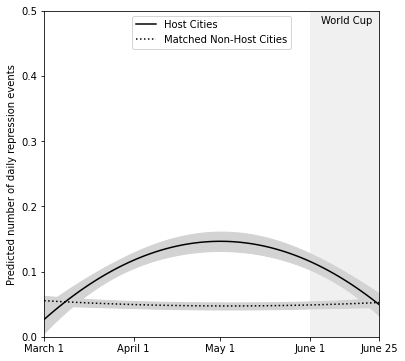

Note: Calculations are based on Model 3, Table SI.4.7, 
with control variables held at observed value. 
Shading around lines gives 95% confidence intervals.


In [111]:
print()
print('\033[1m FIGURE 6.  Substantive Effects for Mached Sample \033[0m')
print(' ---------------------------------------------------------------')
fig, ax = plt.subplots(figsize=(6, 6))

sns.lineplot(data=fig6_df_a, x='time', y='fittedvalues', color='black', ax=ax, label='Host Cities')
sns.lineplot(data=fig6_df_b, x='time', y='fittedvalues', color='black', linestyle='dotted', ax=ax, label='Matched Non-Host Cities')

ax.set_ylim(0, 0.5)
ax.set_xlim(df2['time'].min(), df2['time'].max())
ax.set_xticks([0.01, 0.32, 0.62, 0.93, 1.17])
ax.set_xticklabels(['March 1', 'April 1', 'May 1', 'June 1', 'June 25'])
ax.axvspan(0.93, 1.17, color='#F0F0F0')
ax.text(x=0.97, y=0.48, s='World Cup')
ax.fill_between(x=fig6_df_a.index, y1=fig6_df_a['mean_ci_upper'], y2=fig6_df_a['mean_ci_lower'], color='#D3D3D3')
ax.fill_between(x=fig6_df_b.index, y1=fig6_df_b['mean_ci_upper'], y2=fig6_df_b['mean_ci_lower'], color='#D3D3D3')
ax.set_xlabel('')
ax.set_ylabel('Predicted number of daily repression events')
plt.legend(loc=9)

plt.show()
print('\033[1mNote:\033[0m Calculations are based on Model 3, Table SI.4.7, \nwith control variables held at observed value. \nShading around lines gives 95% confidence intervals.')